# Project2: Anomaly Detection for Exotic Event Identification at the Large Hadron Collider 




## Brief Introduction to the Standard Model and Large Hadron Collider


The Standard model (SM) of Particle Physics is the most complete model physicists have for understanding the interactions of the fundamental particles in the universe. The elementary particles of the SM are shown in Fig.1.

---
<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Standard_Model_of_Elementary_Particles.svg/627px-Standard_Model_of_Elementary_Particles.svg.png" alt="SM" style="width: 600px;"/>
    <figcaption>Fig.1 - Elementary particles of the Standard Model.</figcaption>
</figure>

---

It is comprised of matter particles (**fermions**):
- **leptons**
    - electrons
    - muon
    - tau
    - and respective neutrinos
- **quarks** which are the building blocks of protons

as well as force carrier particles (**bosons**):
- photon and W/Z bosons (electroweak force)
- gluons (strong force)

and the Higgs boson which is attributed to the mechanism which gives particles their mass.


Though the SM has experimentally stood the test of time, many outstanding questions about the universe and the model itself remain, and scientist continue to probe for inconsistencies in the SM in order to find new physics. More exotic models such as **Supersymmetry (SUSY)** predic mirror particles which may exist and have alluded detection thus far. 

---

The **Large Hadron Collider** (LHC) is a particle smasher capable of colliding protons at a centre of mass energy of 14 TeV.
**ATLAS** is general purpouse particle detectors tasked with recording the remnants of proton collisions at the collicion point. The main purpouse of this experiment is to test the SM rigorously, and ATLAS was one of two expeririments (ATLAS+CMS) responsible for the discovery of the **Higgs boson in 2012**. 

Find an animation of how particles are reconstructed within a slice of the ATLAS detector here: https://videos.cern.ch/record/2770812. Electrons, muons, photons, quark jets, etc, will interact with different layers of the detector in different ways, making it possible to design algorithms which distinguish reconstructed particles, measure their trajectories, charge and energy, and identify them as particular types.

Figure 2 shows an event display from a data event in ATLAS in which 2 muons (red), 2 electrons (green), and 1 quark-jet (purple cone) are found. This event is a candidate to a Higgs boson decaying to four leptons with an associated jet: $$H (+j)\rightarrow 2\mu 2e (+j)$$ 



---

<figure>
    <img src="https://twiki.cern.ch/twiki/pub/AtlasPublic/EventDisplayRun2Physics/JiveXML_327636_1535020856-RZ-LegoPlot-EventInfo-2017-10-18-19-01-24.png" alt="Higgs to leptons" style="width: 600px;"/>
    <figcaption>Fig.2 - Event display of a Higgs candidate decaying to two muons and two electrons.</figcaption>
</figure>

---


Particles are shown transversing the detector material. The 3D histogram show 
* the azimuth $\phi$ ( angle around the beam, 0 is up)
* pseudo-rapidity $\eta$ (trajectory along the beam) positions of the particle directions with respect to the interaction point.
* The total energy measured for the particle is denoted by $E$,
* the transverse momentum ($p_T$) deposited by the particle in giga-electronvolts (GeV) are shown by the hight of the histograms.

A particle kinematics can then be described by a four-vector  $$\bar{p} = (E,p_T,\eta,\phi)$$

An additional importan quantity is the missing energy in the transverse plane (MET). This is calculated by taking the negative sum of the transverse momentum of all particles in the event.
$$\mathrm{MET} = -\sum p_T$$

With perfect detector performance the MET will sum to 0 if all outgoing particles are observed by the detector. Neutrinos cannot be measured by the detector and hence their precense produces non-zero MET.

## Anomally detection dataset

For the anomally detection project we will use the dataset discussed in this publication: <p><a href="https://arxiv.org/pdf/2105.14027.pdf" title="Anomalies">The Dark Machines Anomaly Score Challenge:
Benchmark Data and Model Independent Event
Classification for the Large Hadron Collider</a></p>

Familiarise yourself with the paper, in particular from sections 2.1 to 4.4.

---

The dataset contains a collection of simulated proton-proton collisions in a general particle physics detector (such as ATLAS). We will use a dataset containing `340 000` SM events (referred to as channel 2b in the paper) which have at least 2 electrons/muons in the event with $p_T>15$ GeV. 

**The events can be found in `background_chan2b_7.8.csv`**


You can see all the SM processes that are simulated in Table 2 of the paper, 

    e.g., an event with a process ID of `w_jets` is a simulated event of two protons producing a lepton and neutrino and at least two jets.
    
$$pp\rightarrow \ell\nu(+2j)$$

---

The datasets are collected as CSV files where each line represents a single event, with the current format:

`event ID; process ID; event weight; MET; METphi; obj1, E1, pt1, eta1, phi1; obj2, E2, pt2, eta2, phi2; ...`
See Section 2.2 for a description of the dataset.
Variables are split by a semicolon `";"`
- `event ID`: an identifier for the event number in the simulation
- `process ID`: an identifier for the event simulation type
- `event weight`: the weight associated to the simulated event (how important that event is)
- `MET`: the missing transverse energy
- `METphi`: the azimuth angle (direction) of the MET

the a list of objects (particles) whose variables are split by commas `","` in the following orger:
- `obj`: the object type,

    |Key|Particle|
    |---|---|
    |j|jet|
    |b|b-jet|
    |e-|electron|
    |e+|positron|
    |m-|muon|
    |m+|muon+|
    |g|photon|
    
    *see Table 1 of the paper*
- `E`: the total measured particle energy in MeV, [0,inf]
- `pt`: the transverse mementum in MeV, [0,inf]
- `eta`: pseudo-rapidity, [-inf,inf]
- `phi`: azimuth angle, radians [-3.14,3.14]

---

In addition to the SM events we are also provided simulated events from `Beyond Standard Model` (BSM) exotic physics models. They are summarised here:

|Model | File Name | 
|---|---|
|**SUSY chargino-chargino process**||
||`chacha_cha300_neut140_chan2b.csv`|
||`chacha_cha400_neut60_chan2b.csv`|
||`chacha_cha600_neut200_chan2b.csv`|
|**SUSY chargino-neutralino processes**||
||`chaneut_cha200_neut50_chan2b.csv`|
||`chaneut_cha250_neut150_chan2b.csv`|
|**$Z'$ decay to leptons**||
||`pp23mt_50_chan2b.csv`|
||`pp24mt_50_chan2b.csv`|
|**Gluino and RPV SUSY**||
||`gluino_1000.0_neutralino_1.0_chan2b.csv`||
||`stlp_st1000_chan2b.csv`||



## Project description

### Overview
The task is to design an anomaly detection algorithm which is trained on the SM dataset and which can be used to flag up interesting (exotic) events from the BSM physics models.

You will do this by designing a robust `AutoEncoder` which is trained on the event level variables `MET; METphi` and the kinematics of the particle level objects. The `AutoEncoder` needs to duplicate the input as output effectively while going through a laten space (bottleneck). 

You will then need to evaluate and discuss the performance of your `AutoEncoder` on the exotic models listed above, and come up with an appropiate metric to identify events from non SM physics.

# **Breakdown**

In the project report you will be assessed in the following way.

1. **Data exploration and preprocessing (20%):** Inspect the datasets; visualise the data (e.g. tables, plots, etc) in an appropriate way; study the composition of the dataset; perform any necessary preprocessing.
2. **Model selection (30%):** Choose a promissing approach; construct the machine learning model; optimise the relevant hyperparameters; train your chosen model.
3. **Performance evaluation (30%):** Evaluate the model in a way that gauges its ability to generalise to unseen data; compare to other approaches; identify the best approach. 
4. **Discussion, style throughout (20%):** Discuss the reasoning or intuition behind your choices; the results you obtain through your studies; the relative merits of the methods you have developed, _etc._ Similarly, make sure that you write efficient code, document your work, clearly convey your results, and convince us that you have mastered the material.


## Data Preprocessing
* The data is provided in a CSV (text) format with semicolon and comma seperated list with **one line per event**. We need to convert this into an appropiate format for our neural networks. 
* Since the number of particles per event is variable you will need to **truncate** and **mask** particles in the event. The following steps need to be perfomed on the SM (background) sample:
     1. Create variables where you count the number of electrons, photons, muons, jets and bjets in the event (ignore charge) before any truncation.
     2. Choose an appropiate number of particles to study per event (recommended: **8** particles are used in the paper)
     3. Check the particles are sorted by energy (largest to smallest)
     4. If the event has more than 8 particles choose the **8 particles** with **highest energy and truncate** the rest.
     5. convert energy and momentum variables by logarithm (e.g., `log`) - this is to prioritise differences in energy **scale** over more minor differences. 
     6. If the event has less than 8 particles, create kinematic variables with 0 values for the missing particles.
* The final set of training variables should look something like this (the exact format is up to you)
    |N ele| N muon| N jets| N bjets| N photons| log(MET)| METphi| log(E1)| log(pt1)| eta1| phi1| ... | phi8|
    |-|-|-|-|-|-|-|-|-|-|-|-|-|
    
    7. After the dataset is ready, use `MinMaxScalar` or similar to standardise the training variables over the SM dataset
* After the SM dataset has been processed use the same processing on the BSM (signal samples). Use the same standardisation functions as on the SM dataset, *Do not recalculate the standardisation*.
* Keep associated metatata (`event ID; process ID; event weight;`) though this does not need processing. 
* Randomise and split the SM (background) dataset into training and testing datasets (the BSM samples don't need to be split (*Why?*))
* *Hint*: It is suggested that you write a class or function for the preprocessing which takes a csv path as input and provides the processed dataset. After you have done the data processing its suggested you save the datasets so as to not have to recalculate them again if the kernel is restarted. 

## Training
* Design an appropiate algorithm which reconstrucuts the input variables after going though a laten space. Choose an appropiate cost function.
    * The suggested method for ease of implementation is the `AutoEncoder`
    * However, if you consider learning about or trying something else, as described in the paper, you should feel welcome to try `VAEs`, `ConvAEs`, `ConvVAEs`, etc. Don't feel you **have** to create an `AE`.

* Explore different architectures for the model, and explain in detail your choice of model, and the final parameters chosen.
* It is suggested to create a class or function around your algorithm which allows you to easily tweek hyperparameters of the model (depth, number of nodes, number of laten variables, activation functions, regularisation, etc)
* Train the model over several parameters to find the best algorithm. Document the process throught and discuss your choices. Keep track of validation performance. Save the models the best points. 
* Explore the results and document your findings. Ask as many questions about your model as you can, and document your findings. Does the model generalise well to data it hasn't seen?

## Evaluation
In the evaluation explore different datasets an try answer as many questions about the performance as possible. 
* Evaluate the performance of the `AE` on BSM dataset. Which models are more or less similar to the SM?
* Explore the anomaly score as a handle on finding new physics. Consider scanning over different anomaly scores and calculating the signal and background efficiencies at each point (plot this for different BSM models). How might you choose a value which flags up a non-SM event? 
* Explore SM events. Which look more anomolous than others? Are there any particular features which are responsible, e.g. particle counts, MET ranges, etc.? 
* Discuss any limitations your algorithm has. How might you update and improve your model in future? Discuss any issues you had, or things you would have liked to try given more time.

---

To complete this project, you should **Submit your Jupyter notebook** as a "report." See the comments below on documentation,



**You should submit by Friday 10th Feb 2023 at 10AM:**
* your report notebook via Turnitin.
    

For all task we're not looking for exceptional performace and high scores (although those are nice too), **we're mostly concerned with _best practices:_** If you are careful and deliberate in your work, and show us that you can use the tools introduced in the course so far, we're happy!

Training all of these models in sequence takes a very long time so **don't spend hours on training hundreds of epochs.** Be conservative on epoch numbers (30 is more than enough) and use appropiate techniques like EarlyStopping to speed things up. Once you land on a good model you can allow for longer training times if performance can still improve.



### Documentation

**Change the filename to contain Name_Surname**

Your report notebook should run without errors and give (mostly) reproducible results. **Please dont clear the report before submitting**! It is important that **all** code is annotated and that you provide brief commentary **at each step** to explain your approach. Explain *why* you chose a given approach and *discuss* the results. You can also include any failed approaches if you provide reasonable explanation; we care more about you making an effort and showing that you understand the core concepts.

This is not in the form of a written report so do not provide pages of background material, but do try to clearly present your work so that the markers can easily follow your reasoning and can reproduce each of the steps through your analysis. Aim to convince us that you have understood the material covered in the course.

To add commentary above (or below) a code snippet create a new cell and add your text in "Markdown" format. Do not add any substantial commentary as a code comment in the same cell as the code. To change the new cell into markdown select from the drop down menu on the bar above the main window (the default is code)

# Happy Anomaly Hunting
---
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Data Scientist (n.): Person who is better at statistics than any software engineer and better at software engineering than any statistician.</p>&mdash; Josh Wills (@josh_wills) <a href="https://twitter.com/josh_wills/status/198093512149958656?ref_src=twsrc%5Etfw">May 3, 2012</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

---

Your code follows....

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.regularizers import l1_l2

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape, Conv2D, Conv2DTranspose, Concatenate, Lambda,BatchNormalization, MaxPooling2D, UpSampling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, EarlyStopping

import csv
import scipy.stats as stats

2023-02-15 16:30:51.962937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

In [2]:
# Load the original csv data file and save it into a list
def load_data(file):
    with open(file, newline="\n") as csvfile:
        data = list(csv.reader(csvfile, delimiter=';'))
    return data

In [3]:
# Generate event level and object level column names
def create_col_names(data):
    event_general = ["event ID", "process ID", "event weight", "MET", "METphi"]
    event_objs = []
    n_objs = len(max(data,key=len))-5
    for i in range(1,n_objs):
        event_objs.append("obj"+str(i))
        
    return event_general+event_objs

In [4]:
# Format data from csv file to dataframe
def create_dataframe(data,file,col_names):
    sample = pd.read_csv(file,delimiter=";",names=np.arange(0,len(max(data,key=len)))) 
    # last column empty since csv lines end in ;
    sample.drop(sample.columns[len(sample.columns)-1], axis=1, inplace=True) # dropping last empty column
    sample.columns = col_names # renaming columns 
    return sample

In [5]:
# Separate the object level columns into type, energy, pt, eta and phi
# Then create a dataframe to hold these new columns 
def expand_objs(sample_objs):
    objs_expanded = pd.DataFrame()
    for num, obj in enumerate(sample_objs.columns,1):
        expanded_cols = ["obj{}".format(num),"E{}".format(num),"pt{}".format(num),"eta{}".format(num),"phi{}".format(num)]
        expanded_obj = pd.DataFrame(sample_objs[obj].str.split(",",expand=True).values,columns=expanded_cols)
        objs_expanded = pd.concat([objs_expanded,expanded_obj],axis=1)
    return objs_expanded

In [6]:
# Create the new event level features
def process_new_vars(sample, objs_expanded, objs):
    n_electrons = objs_expanded[objs].astype(str).apply(lambda row: ','.join(row.values).count("e"), axis=1 )
    n_muons = objs_expanded[objs].astype(str).apply(lambda row: ','.join(row.values).count("m"), axis=1 )
    n_jets = objs_expanded[objs].astype(str).apply(lambda row: ','.join(row.values).count("j"), axis=1 )
    n_bjets = objs_expanded[objs].astype(str).apply(lambda row: ','.join(row.values).count("b"), axis=1 )
    n_photons = objs_expanded[objs].astype(str).apply(lambda row: ','.join(row.values).count("g"), axis=1 )
    
    log_MET = np.log(sample["MET"].values)
    METphi = sample["METphi"]
    
    # Store new features in dataframe
    new_vars = list(zip(n_electrons,n_muons,n_jets,n_bjets,n_photons,log_MET,METphi))
    new_var_names = np.array(["n_electrons","n_muons","n_jets","n_bjets","n_photons","log(MET)","METphi"])
    processed_new_vars = pd.DataFrame(new_vars,columns=new_var_names)
    return processed_new_vars

In [7]:
# Sort the objects in each event in order of energy
def order_in_energy(objs_expanded,sample_objs,energies):
    energy_order = np.argsort(-objs_expanded[energies].astype("float").values) # find positions of energy in order from largest to smallest
    objs_ordered_array = np.take_along_axis(sample_objs.values,energy_order,1) # re-order event objects based on energy
    objs_ordered = pd.DataFrame(objs_ordered_array, sample_objs.index, sample_objs.columns) # dataframe of objects ordered in energy
    
    # Creating new dataframe to store the separate variables of the ordered objects
    objs_ordered_expanded = pd.DataFrame()
    for num, obj in enumerate(sample_objs.columns,1):
        expanded_cols = ["obj{}".format(num),"E{}".format(num),"pt{}".format(num),"eta{}".format(num),"phi{}".format(num)]
        expanded_obj = pd.DataFrame(objs_ordered[obj].str.split(",",expand=True).values,columns=expanded_cols)
        objs_ordered_expanded = pd.concat([objs_ordered_expanded,expanded_obj],axis=1)
    return objs_ordered_expanded

In [8]:
# Create the new names for the processed dataframe columns
def create_processed_cols(objs):
    processed_cols = np.array([])
    for num, obj in enumerate(objs,1):
        expanded_cols = ["log(E{})".format(num),"log(pt{})".format(num),"eta{}".format(num),"phi{}".format(num)]
        processed_cols = np.append(processed_cols,expanded_cols)
        
    return processed_cols

In [9]:
# Perform the ordering of the event objects and then truncate them
def process_objects(sample, objs_expanded):
    # Getting the necessary variables from the given sample
    energies = objs_expanded.columns[1::5]
    pts = objs_expanded.columns[2::5]
    sample_objs = sample[sample.columns[5:]] # Getting object level variables
    objs = sample_objs.columns # Getting object column names
    
    # Order objects in energy and create the new column names
    objs_ordered_expanded = order_in_energy(objs_expanded,sample_objs,energies)
    processed_cols = create_processed_cols(objs)
    
    # Drop object type column
    objs_ordered_expanded.drop(objs,axis=1,inplace=True)
    
    # Taking log of object energies and pts
    objs_ordered_expanded[energies] = objs_ordered_expanded[energies].astype("float").apply(lambda row: np.log(row))
    objs_ordered_expanded[pts] = objs_ordered_expanded[pts].astype("float").apply(lambda row: np.log(row))
    
    # Rename columns, truncate objects and replace missing variables with 0
    objs_ordered_expanded.columns = processed_cols  
    processed_objs = objs_ordered_expanded[processed_cols[:(8*4)]].astype("float") # Truncating the particles
    processed_objs.fillna(0,inplace=True)
    
    return processed_objs

Creating a new dataframe to store the final processed dataset

In [10]:
# Combine three dataframes
def combine_data(dataset1,dataset2,dataset3):
    return pd.concat([dataset1,dataset2,dataset3],axis=1)

In [11]:
# Final function to perform all of the processing steps involved in the previous functions
# Outputs a dataframe containing the event meta data, event level variables and object level variables (ordered and truncated)
def process_dataset(file):
    sample_data = load_data(file) # Load original file
    col_names = create_col_names(sample_data) # Create dataframe column names
    sample = create_dataframe(sample_data,file,col_names) # Create dataframe containing original file data
    sample_objs = sample[sample.columns[5:]] # Get object level columns
    objs_expanded = expand_objs(sample_objs) # Separate the object level columns into type, energy, pt, eta and phi
    objs = objs_expanded.columns[0::5] # Get new object level column names
    
    processed_objs = process_objects(sample, objs_expanded) # Produce final processed object level columns

    processed_new_vars = process_new_vars(sample, objs_expanded, objs) # Produce processed event level variables
    
    event_meta_data = sample[sample.columns[:3]] # Get event meta data
    
    # Combine meta data, event level variables and object level variables
    processed_data = combine_data(event_meta_data,processed_new_vars,processed_objs) 
    
    return processed_data

Processing and saving SM sample <b>(takes 45 seconds)</b>

In [13]:
SM_processed = process_dataset("background_chan2b_7.8.csv")

/tmp/ipykernel_1032161/2005693100.py:2: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  sample = pd.read_csv(file,delimiter=";",names=np.arange(0,len(max(data,key=len))))#,dtype="object")


In [15]:
SM_processed.to_csv("SM_processed", encoding="utf-8", index=False)

Processing and saving BSM samples <b>(takes 20 seconds)</b>

In [14]:
cha_cha1 = process_dataset("chacha_cha300_neut140_chan2b.csv")
cha_cha1.to_csv("cha_cha1", encoding="utf-8", index=False)

In [15]:
cha_cha2 = process_dataset("chacha_cha400_neut60_chan2b.csv")
cha_cha2.to_csv("cha_cha2", encoding="utf-8", index=False)

In [16]:
cha_cha3 = process_dataset("chacha_cha600_neut200_chan2b.csv")
cha_cha3.to_csv("cha_cha3", encoding="utf-8", index=False)

In [17]:
cha_neut1 = process_dataset("chaneut_cha200_neut50_chan2b.csv")
cha_neut1.to_csv("cha_neut1", encoding="utf-8", index=False)

In [18]:
cha_neut2 = process_dataset("chaneut_cha250_neut150_chan2b.csv")
cha_neut2.to_csv("cha_neut2", encoding="utf-8", index=False)

In [19]:
zprime_lept1 = process_dataset("pp23mt_50_chan2b.csv")
zprime_lept1.to_csv("zprime_lept1", encoding="utf-8", index=False)

In [20]:
zprime_lept2 = process_dataset("pp24mt_50_chan2b.csv")
zprime_lept2.to_csv("zprime_lept2", encoding="utf-8", index=False)

In [21]:
gluino = process_dataset("gluino_1000.0_neutralino_1.0_chan2b.csv")
gluino.to_csv("gluino", encoding="utf-8", index=False)

/tmp/ipykernel_1032161/2005693100.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  sample = pd.read_csv(file,delimiter=";",names=np.arange(0,len(max(data,key=len))))#,dtype="object")


In [22]:
rpv = process_dataset("stlp_st1000_chan2b.csv")
rpv.to_csv("rpv", encoding="utf-8", index=False)

Combine BSM samples

In [23]:
BSM_sample_values = [cha_cha1,cha_cha2,cha_cha3,cha_neut1,cha_neut2,
                zprime_lept1,zprime_lept2,gluino,rpv]

Sorting BSM samples in order of number of events, least first, most last

In [24]:
BSM_sample_values.sort(key=len)

In [25]:
BSM_samples = pd.DataFrame()
for num, sample in enumerate(BSM_sample_values,1):
    BSM_samples = pd.concat([BSM_samples,sample],sort=False,axis=0)
BSM_samples.reset_index(drop=True, inplace=True)

Saving BSM samples

In [26]:
BSM_samples.to_csv("BSM_samples", encoding="utf-8", index=False)

### Preparing processed data for training

#### Load SM dataset and separate training/testing variables

In [29]:
SM_processed = pd.read_csv("SM_processed")

In [111]:
SM_processed

,event ID,process ID,event weight,n_electrons,n_muons,n_jets,n_bjets,n_photons,log(MET),METphi,...,eta6,phi6,log(E7),log(pt7),eta7,phi7,log(E8),log(pt8),eta8,phi8
0,5702564,z_jets,1,2,0,7,0,0,11.538096,-2.966200,...,0.840127,-1.738050,11.289961,11.280763,0.135844,0.275231,10.918245,10.867301,-0.183147,2.62501
1,13085335,z_jets,1,0,2,1,0,0,11.547018,1.961930,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,74025,wtopbar,1,0,2,1,1,0,11.770725,-1.178890,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,2419445,z_jets,1,0,2,2,0,0,11.261565,-1.091710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,43639,wtop,1,0,2,1,1,0,11.581994,-1.026420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340263,30,ttbar,1,0,2,1,1,0,11.092509,-1.153600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
340264,111,ttbar,1,0,2,2,1,0,10.980708,0.529769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
340265,75,ttbar,1,0,2,4,1,0,12.744695,0.804597,...,-1.479520,-0.035129,10.831400,10.615726,0.674197,-1.571720,0.000000,0.000000,0.000000,0.00000
340266,15181306,z_jets,1,0,2,3,0,0,12.417140,-0.849401,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [30]:
X = SM_processed.drop(["event ID","process ID","event weight"],axis=1)
X.shape

(340268, 39)

#### Load BSM dataset and separate testing variables

In [112]:
BSM_samples = pd.read_csv("BSM_samples")

In [113]:
BSM_samples

,event ID,process ID,event weight,n_electrons,n_muons,n_jets,n_bjets,n_photons,log(MET),METphi,...,eta6,phi6,log(E7),log(pt7),eta7,phi7,log(E8),log(pt8),eta8,phi8
0,43573,chacha_cha300_neut140,1.858220e-06,0,2,1,0,0,11.292929,-1.382100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,43573,chacha_cha300_neut140,1.858220e-06,2,0,2,0,0,11.431839,-0.500404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,43573,chacha_cha300_neut140,1.858220e-06,0,2,2,0,0,11.471559,2.297730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,43573,chacha_cha300_neut140,1.858220e-06,1,1,1,0,0,11.459957,-1.576530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,43573,chacha_cha300_neut140,1.858220e-06,0,2,2,0,0,11.917043,-1.749410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89671,1,gluino_1000.0_neutralino_1.0,1.966569e-07,1,1,3,3,0,12.931711,-0.271422,...,0.785583,2.178400,11.990165,10.889052,-1.761990,2.408990,10.237990,9.670912,-1.167880,-0.086139
89672,1,gluino_1000.0_neutralino_1.0,1.966569e-07,1,1,5,2,0,12.065580,0.166935,...,-1.916160,-2.099110,11.531600,11.291363,-0.683398,-1.580590,11.409348,11.342461,0.361888,2.131770
89673,1,gluino_1000.0_neutralino_1.0,1.966569e-07,1,1,4,4,1,11.296432,-0.517197,...,-0.541815,0.575376,11.266018,10.197507,1.730760,-2.492510,11.116548,11.007238,0.468008,2.281720
89674,1,gluino_1000.0_neutralino_1.0,1.966569e-07,2,0,6,3,0,12.731999,-2.678240,...,0.547785,1.626630,11.757463,10.671872,-1.745180,-0.876267,11.459594,11.245750,-0.671473,-0.469902


In [32]:
BSM_sample_IDs = BSM_samples[["event ID","process ID","event weight"]]

In [33]:
BSM_samples = BSM_samples.drop(["event ID","process ID","event weight"],axis=1)

In [34]:
BSM_sample_names = list(dict.fromkeys(BSM_sample_IDs["process ID"]))

### Visualising the variables

#### SM and combined BSM variables

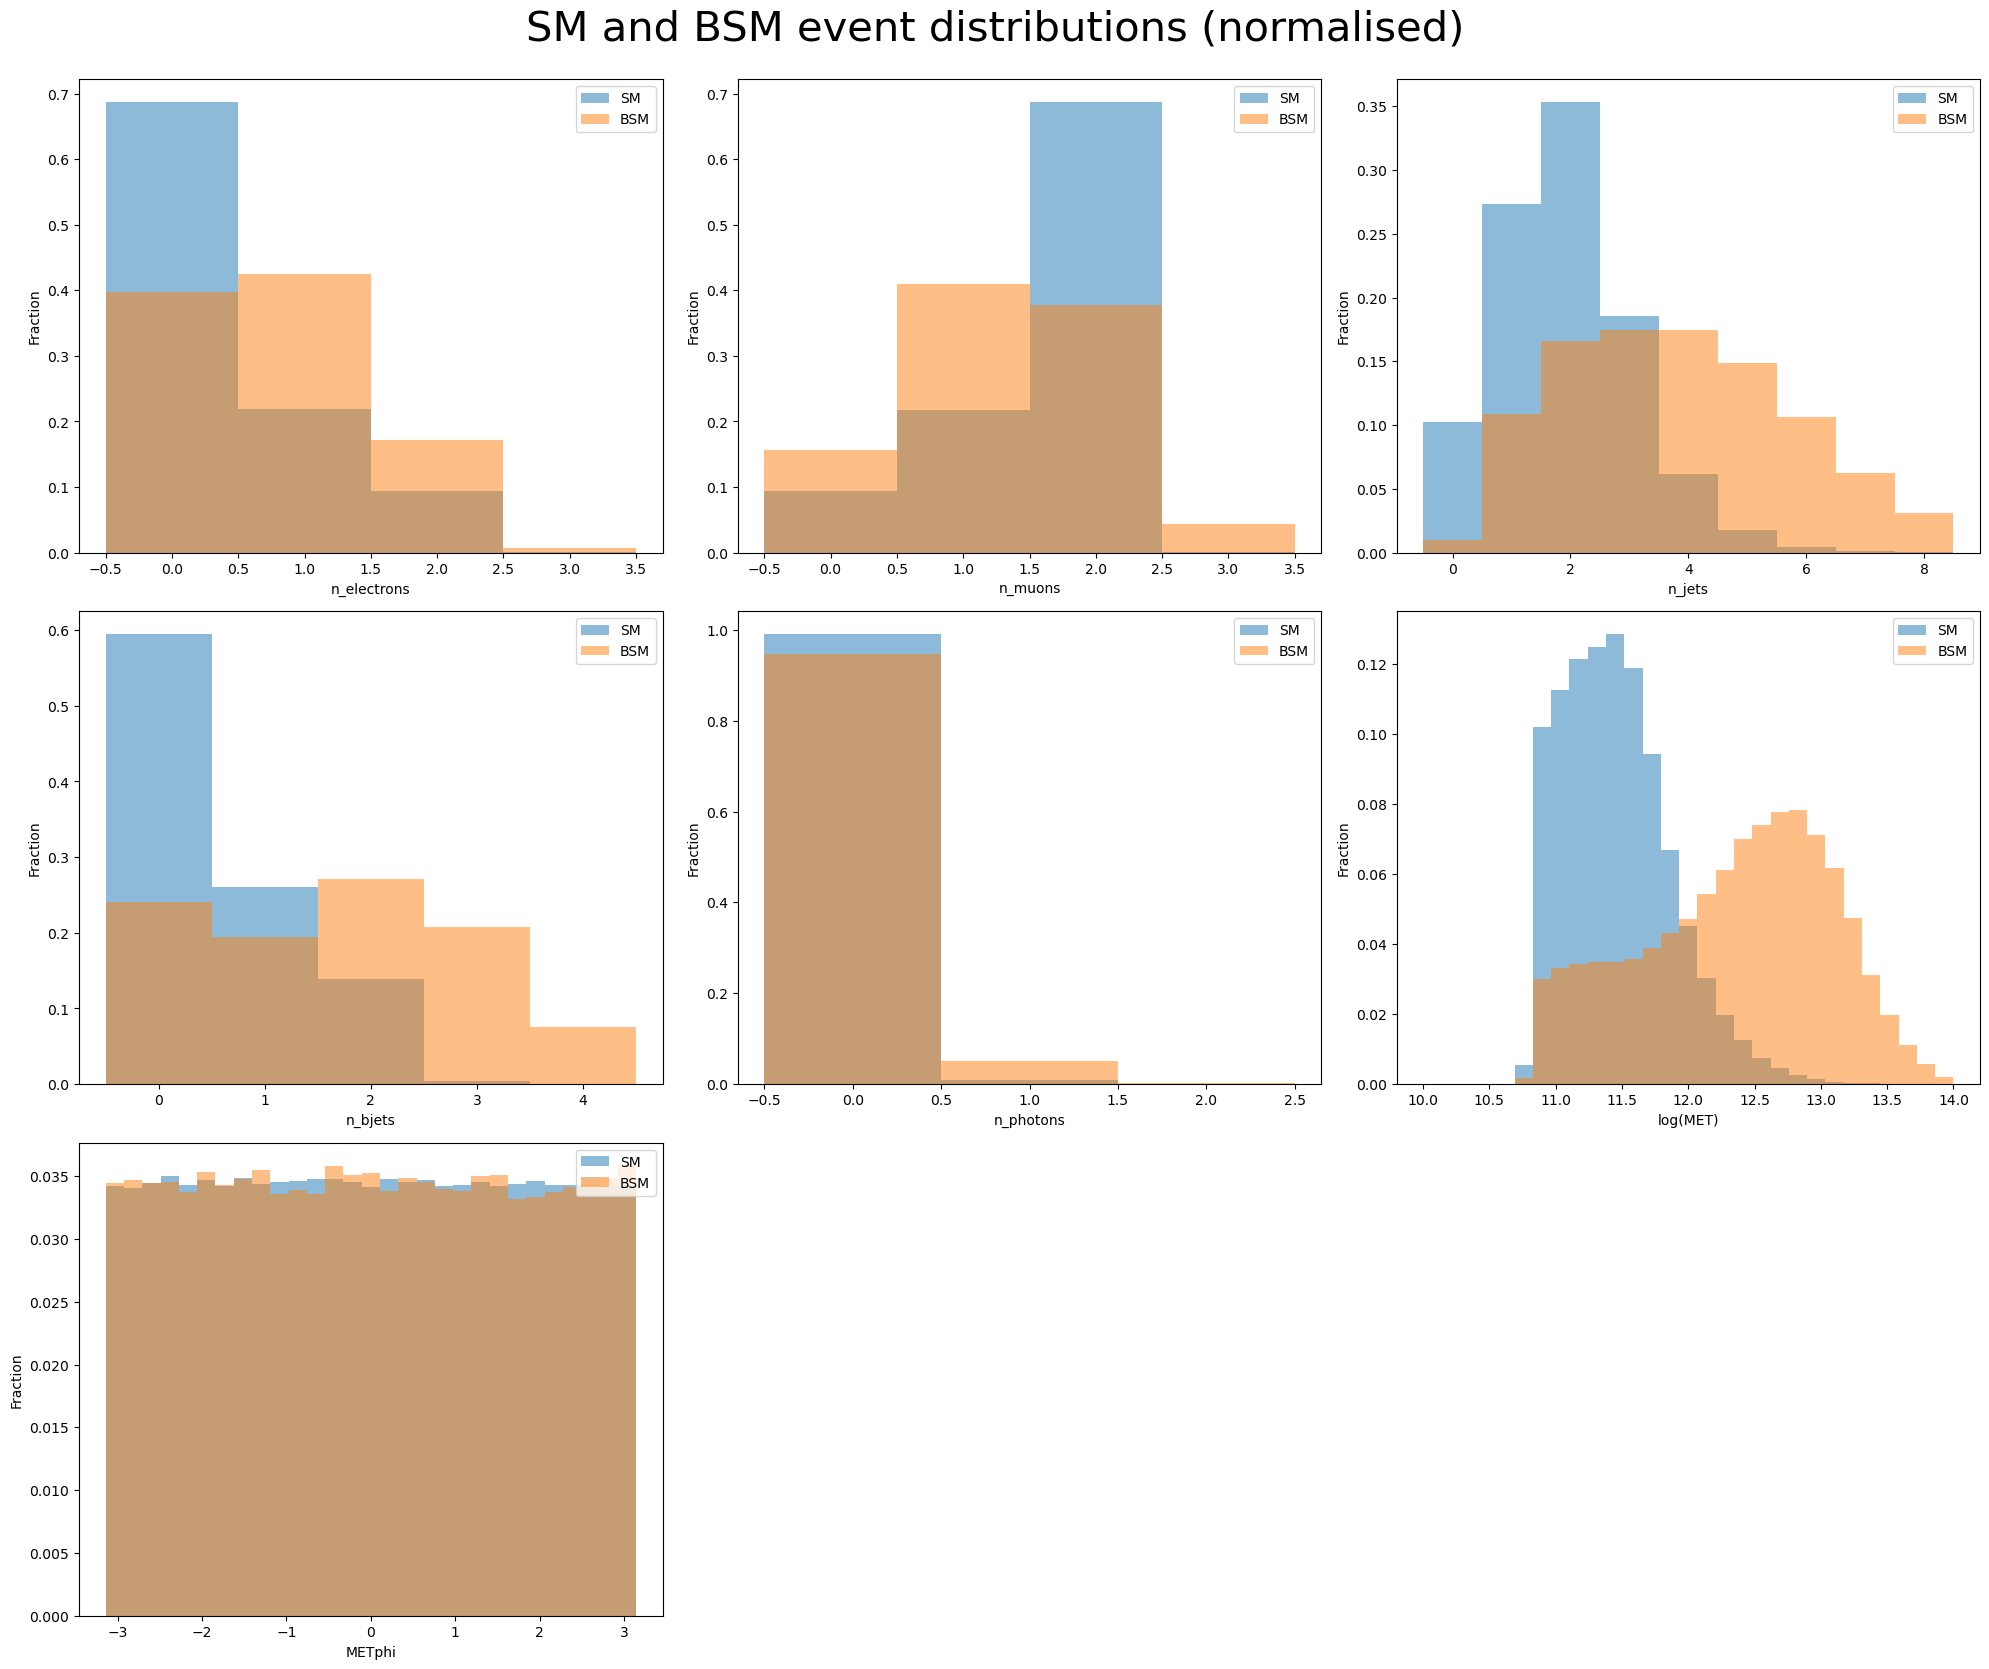

In [35]:
plt.figure(figsize=(20,80))

bins = [np.linspace(-0.5,3.5,5),np.linspace(-0.5,3.5,5),np.linspace(-0.5,8.5,10),np.linspace(-0.5,4.5,6),
        np.linspace(-0.5,2.5,4),np.linspace(10,14,30),np.linspace(-np.pi,np.pi,30)]

var_names = X.columns[:7]

for i, var in enumerate(var_names):
    ax = plt.subplot(15,3,i+1)
    for j in [X[var],BSM_samples[var]]:
        non_zero = np.count_nonzero(~np.isnan(j))
        weights = np.ones_like(j)/float(non_zero)
        plt.hist(j,alpha=0.5,bins=bins[i],weights=weights)

    plt.xlabel(var)
    plt.ylabel("Fraction")
    plt.legend(["SM","BSM"])        
    
plt.suptitle("SM and BSM event distributions (normalised)",y=1,size=30)    
plt.tight_layout()
plt.show()

This distribution compares the combined BSM samples and the SM sample. The BSM sample distribution will be swayed by the biggest samples corresponding to the gluino and stlp samples. However, this comparison is still useful to compare general trends and can be combined with the comparison of the separate BSM sample distributions below for a clearer view. 

What can be seen in this comparison:

- BSM has more electrons, jets, bjets on average

- BSM has less muons on average

- BSM has considerably higher MET 

- BSM has very similar photon distribution

- Both BSM and SM have uniform METphi distributions


These distributions indicate that BSM variables have wider spread and mostly have higher means. Also it can be seen that BSM events have higher average object multiplicities for all objects apart from muons.

#### Separate BSM variables

In [36]:
def sig_position(BSM_sample_IDs,sample,off_set):
    return np.where(BSM_sample_IDs["process ID"]==BSM_sample_names[sample])[0]+off_set

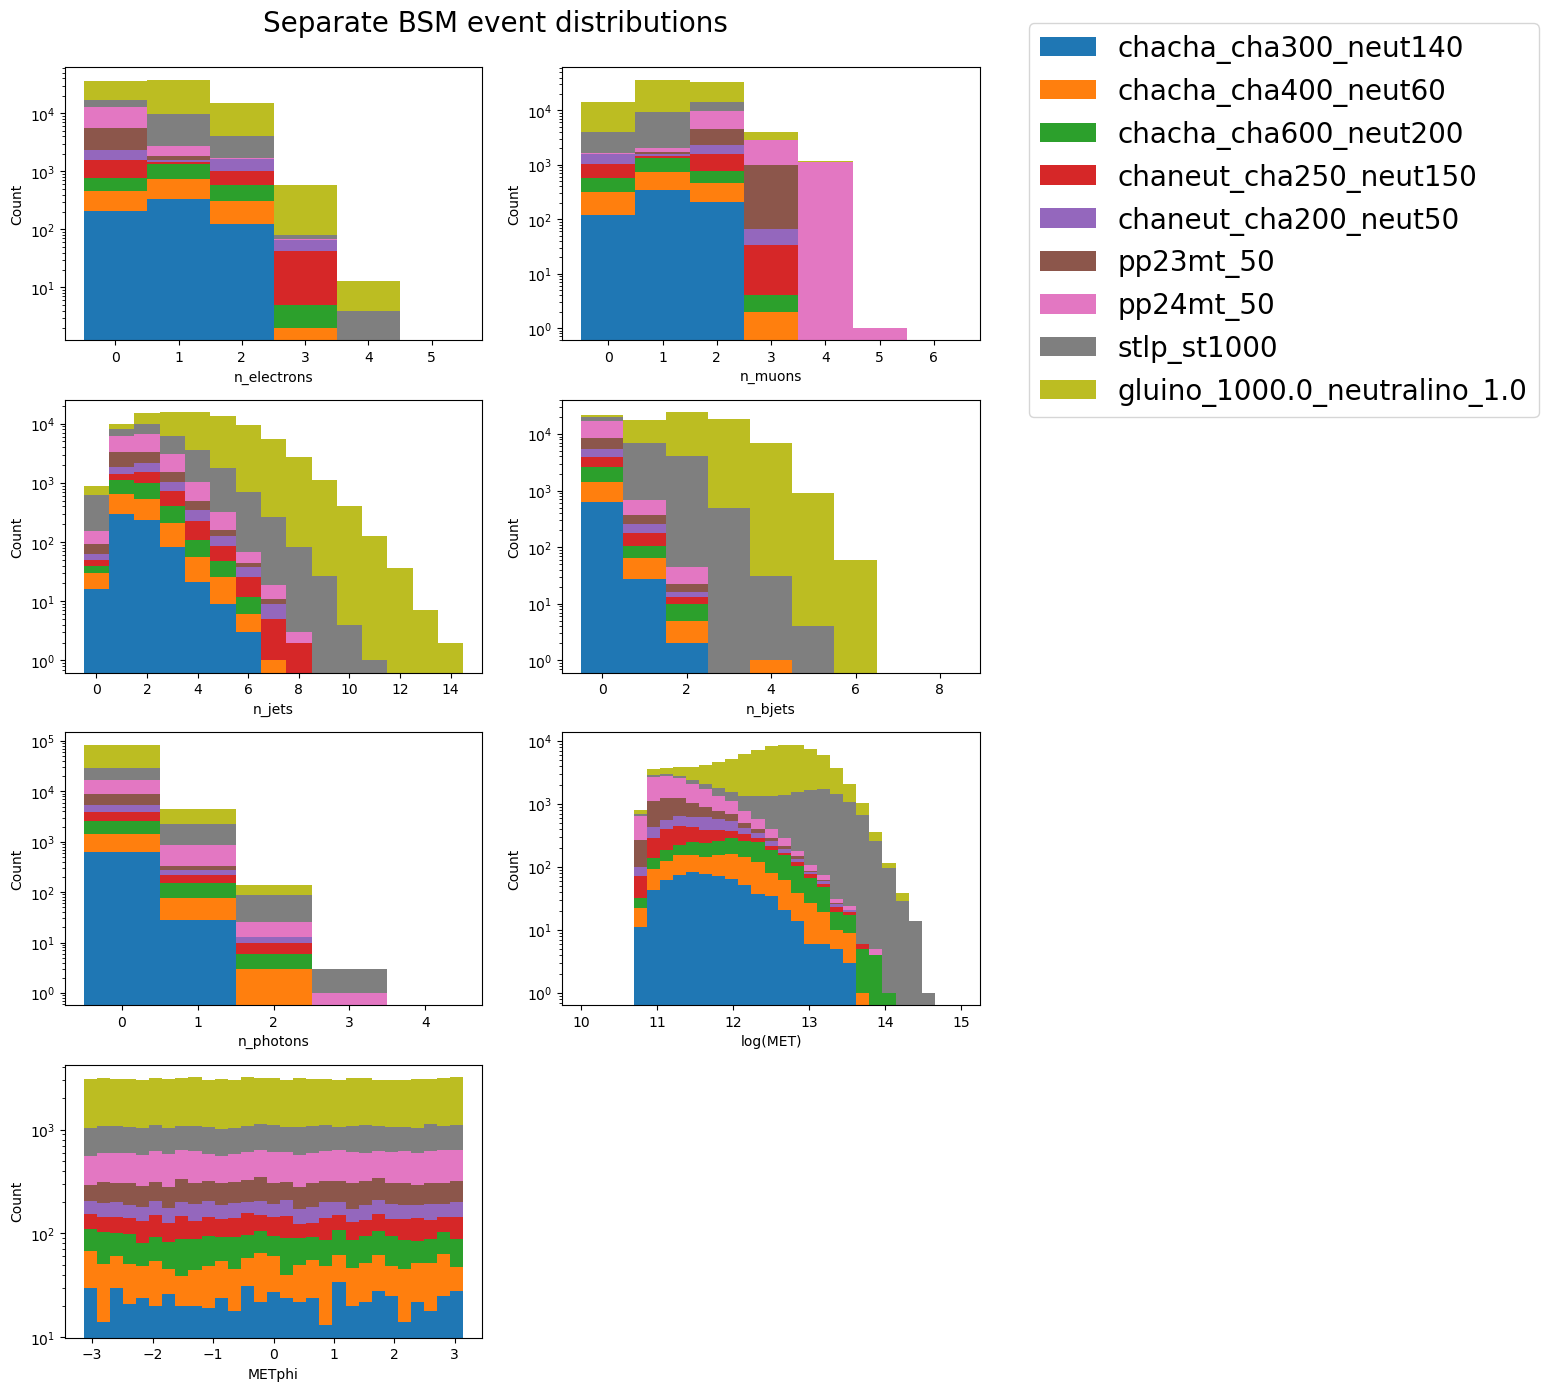

In [37]:
plt.figure(figsize=(10,50))

bins = [np.linspace(-0.5,5.5,7),np.linspace(-0.5,6.5,8),np.linspace(-0.5,14.5,16),np.linspace(-0.5,8.5,10),
        np.linspace(-0.5,4.5,6),np.linspace(10,15,30),np.linspace(-np.pi,np.pi,30)]
    
var_names = X.columns[:7]

for i, var in enumerate(var_names):
    ax = plt.subplot(15,2,i+1)

    sig1 = BSM_samples[var][sig_position(BSM_sample_IDs,0,0)]
    sig2 = BSM_samples[var][sig_position(BSM_sample_IDs,1,0)]
    sig3 = BSM_samples[var][sig_position(BSM_sample_IDs,2,0)]
    sig4 = BSM_samples[var][sig_position(BSM_sample_IDs,3,0)]
    sig5 = BSM_samples[var][sig_position(BSM_sample_IDs,4,0)]
    sig6 = BSM_samples[var][sig_position(BSM_sample_IDs,5,0)]
    sig7 = BSM_samples[var][sig_position(BSM_sample_IDs,6,0)]
    sig8 = BSM_samples[var][sig_position(BSM_sample_IDs,7,0)]
    sig9 = BSM_samples[var][sig_position(BSM_sample_IDs,8,0)]
    
    ax.hist([sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,sig9],bins=bins[i],stacked=True)
    sample_names = BSM_sample_names
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.yscale("log")
    
plt.suptitle("Separate BSM variable distributions",y=1,size=20)    
plt.figlegend(sample_names,bbox_to_anchor=(1.02, 1), loc="upper left",prop={'size': 20})
plt.tight_layout()
plt.show()

What can be seen in this comparison:

- gluino and stlp have widest distribution in n_electrons

- pp24mt has the widest distribution in n_muons

- gluino has the widest distribution in n_jets, followed by stlp and pp24mt and chaneut_cha250

- gluino has widest n_bjets distribution, followed by pp24mt

- stlp and pp24mt have the widest n_photons distributions

- stlp has the widest and highest centered log(MET), followed by gluino with slightly lower centering and spread

- a uniform distribution is seen for METphi across all samples with no apparent bias


gluino and stlp samples generally have the most spread out distributions with larger means.


The rest of the samples have distributions that are less spread out and with lower means. These samples follow distributions which are much closer to the background distribution.

#### Splitting SM background into training and testing samples

In [38]:
x_train, x_test = train_test_split(X,
                                   test_size=0.3, 
                                   random_state=1)

In [39]:
x_train, x_test, idx_train, idx_test = train_test_split(X, 
                                                    np.arange(0,X.shape[0],dtype="int"),                    
                                                    test_size=0.3, 
                                                    random_state=1)

In [40]:
x_train.shape,x_test.shape

((238187, 39), (102081, 39))

#### Scale training variables

In [41]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

#### Scale testing variables

In [42]:
x_test = scaler.transform(x_test)

In [43]:
BSM_samples = scaler.transform(BSM_samples)

## Training

### Building the Autoencoder

Making a function to easily create the AE model with different hyperparameters

In [105]:
def model_ae(latent_dim,h_layers,activation,dropout):
    # Initialise model
    model = tf.keras.Sequential()
    
    # Set the input layer corresponding to the event variables
    input_event = Input(shape=(39), name="encoder_input")
    model.add(input_event)  
    
    # Add the hidden layers in encoder, starting with last from list
    for i in [200,200,20][(3-h_layers):]:
        model.add(Dense(i, activation=activation))
        # Add drop out layer after each hidden layer
        if dropout != 0:
            model.add(Dropout(dropout))
    model.add(Dense(latent_dim, activation=activation))

    # Add the hidden layers in decoder, starting with last from list
    for i in [200,200,20][(3-h_layers):][::-1]:
        model.add(Dense(i, activation=activation))
        # Add dropout layer after each hidden layer
        if dropout != 0:
            model.add(Dropout(dropout))
    # Set output layer with linear activation function and same shape as encoder input layer
    model.add(Dense(39, activation="linear"))
    
    # Compile the AE
    model.compile(optimizer="adam", loss="mean_squared_error")
    
    return model

Decoder uses a linear output layer activation to allow for reconstruction of all possible values fed in as input. Sigmoid activation cannot map BSM values that have been scaled below 0 or above 1.

Choosing MSE loss function as this is well suited to the regression problem.

In [106]:
ae = model_ae(10,3,"relu",0) # Baseline model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 200)               8000      
                                                                 
 dense_40 (Dense)            (None, 200)               40200     
                                                                 
 dense_41 (Dense)            (None, 20)                4020      
                                                                 
 dense_42 (Dense)            (None, 10)                210       
                                                                 
 dense_43 (Dense)            (None, 20)                220       
                                                                 
 dense_44 (Dense)            (None, 200)               4200      
                                                                 
 dense_45 (Dense)            (None, 200)              

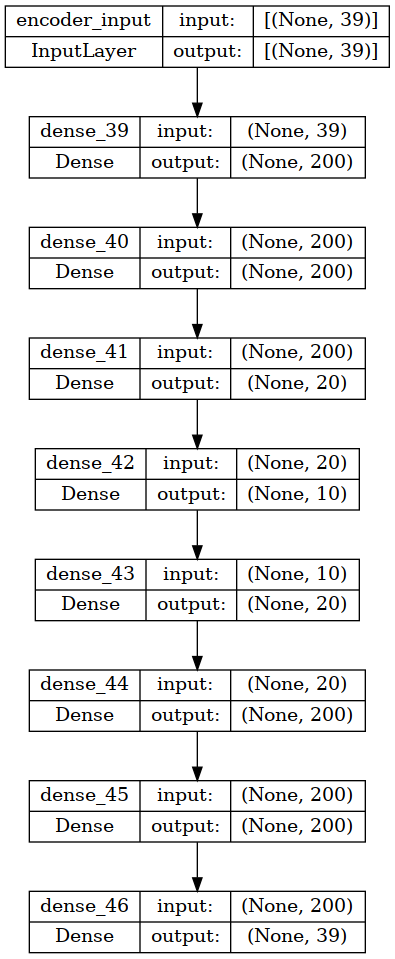

In [107]:
ae.summary()
plot_model(ae,show_shapes = True, show_layer_names = True)

### Performing Gridsearch of hyperparameters

Hyperparameters that will remain fixed: 

- Using layer nodes 200, 200, 20 and tuning the number of the layers, keeping lowest number of nodes as last layer

- Kernel initialisation = default

- Optimiser = adam

- Input features = leading 8 objects + log(MET) + METphi + n_electrons + n_muons + n_jets + n_bjets + n_photons

Hyperparameters that will be selected:

- activation: relu, tanh

- dropout: 0, 0.05

- latent dim.: 5,10,15

- number of hidden layers: 1,2,3

The hyperparamters that will be optimised were deemed as the most influential on the network performance

In [47]:
latent_dim = [5,10,15]
h_layers = [1,2,3]
activation = ["tanh","relu"]
dropout = [0,0.05]

In [37]:
min_val_loss = np.array([])
# Loop over all possible combinations of chosen hyperparameter values
for dim in latent_dim:
    for layers in h_layers:
        for activ in activation:
            for d in dropout:
                # Save each model weights and stop training early if no improvement after 10 epochs
                my_callbacks = [
                    ModelCheckpoint(
                    filepath="dim={},layers={},activ={},d={}.hdf5".format(dim,layers,activ,d),
                    save_weights_only=True,
                    monitor="val_loss",
                    save_freq="epoch",
                    save_best_only=True,
                    mode="auto",
                    verbose=True),

                    EarlyStopping(
                    monitor="val_loss",
                    patience=10,
                    verbose=0,
                    mode="auto")]

                # Set model paramters
                ae = model_ae(dim,layers,activ,d)
                # Configure training details
                history_ae = ae.fit(x_train,
                                    x_train, 
                                    epochs=30, 
                                    batch_size=256, 
                                    shuffle=True, 
                                    callbacks=my_callbacks,
                                    validation_split=0.2,
                                    verbose=0)
                # Save lowest val_loss of each model
                min_val_loss = np.append(min_val_loss,min(history_ae.history["val_loss"]))


Epoch 1: val_loss improved from inf to 0.02250, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 2: val_loss improved from 0.02250 to 0.01893, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 3: val_loss improved from 0.01893 to 0.01782, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 4: val_loss improved from 0.01782 to 0.01732, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 5: val_loss improved from 0.01732 to 0.01657, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 6: val_loss improved from 0.01657 to 0.01566, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 7: val_loss improved from 0.01566 to 0.01490, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 8: val_loss improved from 0.01490 to 0.01448, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 9: val_loss improved from 0.01448 to 0.01424, saving model to dim=5,layers=1,activ=tanh,d=0.hdf5

Epoch 10: val_loss improved from 0.01424 to 0.01414, saving model t


Epoch 1: val_loss improved from inf to 0.02201, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 2: val_loss improved from 0.02201 to 0.01749, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 3: val_loss improved from 0.01749 to 0.01607, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 4: val_loss improved from 0.01607 to 0.01513, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 5: val_loss improved from 0.01513 to 0.01462, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 6: val_loss improved from 0.01462 to 0.01428, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 7: val_loss improved from 0.01428 to 0.01404, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 8: val_loss improved from 0.01404 to 0.01388, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 9: val_loss improved from 0.01388 to 0.01367, saving model to dim=5,layers=1,activ=relu,d=0.05.hdf5

Epoch 10: val_loss improved from 0.01367


Epoch 3: val_loss improved from 0.01725 to 0.01399, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 4: val_loss improved from 0.01399 to 0.01329, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 5: val_loss improved from 0.01329 to 0.01261, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 6: val_loss improved from 0.01261 to 0.01226, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 7: val_loss improved from 0.01226 to 0.01215, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 8: val_loss improved from 0.01215 to 0.01205, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 9: val_loss improved from 0.01205 to 0.01194, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 10: val_loss improved from 0.01194 to 0.01191, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 11: val_loss improved from 0.01191 to 0.01171, saving model to dim=5,layers=2,activ=relu,d=0.hdf5

Epoch 12: val_loss improved from 0.01171 to 0.01168, saving m


Epoch 28: val_loss did not improve from 0.00836

Epoch 29: val_loss improved from 0.00836 to 0.00833, saving model to dim=5,layers=3,activ=tanh,d=0.hdf5

Epoch 30: val_loss improved from 0.00833 to 0.00826, saving model to dim=5,layers=3,activ=tanh,d=0.hdf5

Epoch 1: val_loss improved from inf to 0.01755, saving model to dim=5,layers=3,activ=tanh,d=0.05.hdf5

Epoch 2: val_loss improved from 0.01755 to 0.01749, saving model to dim=5,layers=3,activ=tanh,d=0.05.hdf5

Epoch 3: val_loss improved from 0.01749 to 0.01702, saving model to dim=5,layers=3,activ=tanh,d=0.05.hdf5

Epoch 4: val_loss improved from 0.01702 to 0.01667, saving model to dim=5,layers=3,activ=tanh,d=0.05.hdf5

Epoch 5: val_loss improved from 0.01667 to 0.01656, saving model to dim=5,layers=3,activ=tanh,d=0.05.hdf5

Epoch 6: val_loss improved from 0.01656 to 0.01655, saving model to dim=5,layers=3,activ=tanh,d=0.05.hdf5

Epoch 7: val_loss improved from 0.01655 to 0.01655, saving model to dim=5,layers=3,activ=tanh,d=0.05.h


Epoch 3: val_loss improved from 0.01064 to 0.00897, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 4: val_loss improved from 0.00897 to 0.00860, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 5: val_loss improved from 0.00860 to 0.00803, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 6: val_loss improved from 0.00803 to 0.00759, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 7: val_loss improved from 0.00759 to 0.00750, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 8: val_loss improved from 0.00750 to 0.00746, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 9: val_loss improved from 0.00746 to 0.00744, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 10: val_loss improved from 0.00744 to 0.00742, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 11: val_loss improved from 0.00742 to 0.00741, saving model to dim=10,layers=1,activ=tanh,d=0.hdf5

Epoch 12: val_loss improved from 0.00741 to 0.00737,


Epoch 22: val_loss improved from 0.00829 to 0.00823, saving model to dim=10,layers=1,activ=relu,d=0.hdf5

Epoch 23: val_loss improved from 0.00823 to 0.00820, saving model to dim=10,layers=1,activ=relu,d=0.hdf5

Epoch 24: val_loss improved from 0.00820 to 0.00815, saving model to dim=10,layers=1,activ=relu,d=0.hdf5

Epoch 25: val_loss improved from 0.00815 to 0.00813, saving model to dim=10,layers=1,activ=relu,d=0.hdf5

Epoch 26: val_loss improved from 0.00813 to 0.00810, saving model to dim=10,layers=1,activ=relu,d=0.hdf5

Epoch 27: val_loss improved from 0.00810 to 0.00802, saving model to dim=10,layers=1,activ=relu,d=0.hdf5

Epoch 28: val_loss did not improve from 0.00802

Epoch 29: val_loss improved from 0.00802 to 0.00792, saving model to dim=10,layers=1,activ=relu,d=0.hdf5

Epoch 30: val_loss did not improve from 0.00792

Epoch 1: val_loss improved from inf to 0.01853, saving model to dim=10,layers=1,activ=relu,d=0.05.hdf5

Epoch 2: val_loss improved from 0.01853 to 0.01573, sav


Epoch 14: val_loss improved from 0.00759 to 0.00758, saving model to dim=10,layers=2,activ=tanh,d=0.05.hdf5

Epoch 15: val_loss did not improve from 0.00758

Epoch 16: val_loss did not improve from 0.00758

Epoch 17: val_loss did not improve from 0.00758

Epoch 18: val_loss did not improve from 0.00758

Epoch 19: val_loss improved from 0.00758 to 0.00758, saving model to dim=10,layers=2,activ=tanh,d=0.05.hdf5

Epoch 20: val_loss did not improve from 0.00758

Epoch 21: val_loss improved from 0.00758 to 0.00757, saving model to dim=10,layers=2,activ=tanh,d=0.05.hdf5

Epoch 22: val_loss improved from 0.00757 to 0.00755, saving model to dim=10,layers=2,activ=tanh,d=0.05.hdf5

Epoch 23: val_loss did not improve from 0.00755

Epoch 24: val_loss did not improve from 0.00755

Epoch 25: val_loss did not improve from 0.00755

Epoch 26: val_loss improved from 0.00755 to 0.00755, saving model to dim=10,layers=2,activ=tanh,d=0.05.hdf5

Epoch 27: val_loss did not improve from 0.00755

Epoch 28: val


Epoch 18: val_loss improved from 0.00337 to 0.00331, saving model to dim=10,layers=3,activ=tanh,d=0.hdf5

Epoch 19: val_loss improved from 0.00331 to 0.00330, saving model to dim=10,layers=3,activ=tanh,d=0.hdf5

Epoch 20: val_loss improved from 0.00330 to 0.00327, saving model to dim=10,layers=3,activ=tanh,d=0.hdf5

Epoch 21: val_loss improved from 0.00327 to 0.00321, saving model to dim=10,layers=3,activ=tanh,d=0.hdf5

Epoch 22: val_loss improved from 0.00321 to 0.00318, saving model to dim=10,layers=3,activ=tanh,d=0.hdf5

Epoch 23: val_loss did not improve from 0.00318

Epoch 24: val_loss improved from 0.00318 to 0.00315, saving model to dim=10,layers=3,activ=tanh,d=0.hdf5

Epoch 25: val_loss improved from 0.00315 to 0.00313, saving model to dim=10,layers=3,activ=tanh,d=0.hdf5

Epoch 26: val_loss improved from 0.00313 to 0.00312, saving model to dim=10,layers=3,activ=tanh,d=0.hdf5

Epoch 27: val_loss improved from 0.00312 to 0.00310, saving model to dim=10,layers=3,activ=tanh,d=0.hd


Epoch 21: val_loss improved from 0.00391 to 0.00381, saving model to dim=10,layers=3,activ=relu,d=0.05.hdf5

Epoch 22: val_loss improved from 0.00381 to 0.00375, saving model to dim=10,layers=3,activ=relu,d=0.05.hdf5

Epoch 23: val_loss improved from 0.00375 to 0.00374, saving model to dim=10,layers=3,activ=relu,d=0.05.hdf5

Epoch 24: val_loss did not improve from 0.00374

Epoch 25: val_loss improved from 0.00374 to 0.00367, saving model to dim=10,layers=3,activ=relu,d=0.05.hdf5

Epoch 26: val_loss did not improve from 0.00367

Epoch 27: val_loss improved from 0.00367 to 0.00367, saving model to dim=10,layers=3,activ=relu,d=0.05.hdf5

Epoch 28: val_loss improved from 0.00367 to 0.00367, saving model to dim=10,layers=3,activ=relu,d=0.05.hdf5

Epoch 29: val_loss improved from 0.00367 to 0.00367, saving model to dim=10,layers=3,activ=relu,d=0.05.hdf5

Epoch 30: val_loss improved from 0.00367 to 0.00359, saving model to dim=10,layers=3,activ=relu,d=0.05.hdf5

Epoch 1: val_loss improved fr


Epoch 15: val_loss did not improve from 0.00598

Epoch 16: val_loss improved from 0.00598 to 0.00598, saving model to dim=15,layers=1,activ=relu,d=0.hdf5

Epoch 17: val_loss improved from 0.00598 to 0.00597, saving model to dim=15,layers=1,activ=relu,d=0.hdf5

Epoch 18: val_loss improved from 0.00597 to 0.00597, saving model to dim=15,layers=1,activ=relu,d=0.hdf5

Epoch 19: val_loss did not improve from 0.00597

Epoch 20: val_loss did not improve from 0.00597

Epoch 21: val_loss improved from 0.00597 to 0.00597, saving model to dim=15,layers=1,activ=relu,d=0.hdf5

Epoch 22: val_loss did not improve from 0.00597

Epoch 23: val_loss did not improve from 0.00597

Epoch 24: val_loss improved from 0.00597 to 0.00597, saving model to dim=15,layers=1,activ=relu,d=0.hdf5

Epoch 25: val_loss improved from 0.00597 to 0.00597, saving model to dim=15,layers=1,activ=relu,d=0.hdf5

Epoch 26: val_loss did not improve from 0.00597

Epoch 27: val_loss improved from 0.00597 to 0.00596, saving model to 


Epoch 1: val_loss improved from inf to 0.00807, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 2: val_loss improved from 0.00807 to 0.00657, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 3: val_loss improved from 0.00657 to 0.00570, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 4: val_loss improved from 0.00570 to 0.00555, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 5: val_loss improved from 0.00555 to 0.00532, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 6: val_loss improved from 0.00532 to 0.00506, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 7: val_loss improved from 0.00506 to 0.00490, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 8: val_loss improved from 0.00490 to 0.00477, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 9: val_loss improved from 0.00477 to 0.00457, saving model to dim=15,layers=2,activ=relu,d=0.hdf5

Epoch 10: val_loss improved from 0.00457 to 0.00451, savin


Epoch 28: val_loss did not improve from 0.00078

Epoch 29: val_loss improved from 0.00078 to 0.00072, saving model to dim=15,layers=3,activ=tanh,d=0.hdf5

Epoch 30: val_loss improved from 0.00072 to 0.00068, saving model to dim=15,layers=3,activ=tanh,d=0.hdf5

Epoch 1: val_loss improved from inf to 0.00486, saving model to dim=15,layers=3,activ=tanh,d=0.05.hdf5

Epoch 2: val_loss improved from 0.00486 to 0.00388, saving model to dim=15,layers=3,activ=tanh,d=0.05.hdf5

Epoch 3: val_loss did not improve from 0.00388

Epoch 4: val_loss improved from 0.00388 to 0.00383, saving model to dim=15,layers=3,activ=tanh,d=0.05.hdf5

Epoch 5: val_loss improved from 0.00383 to 0.00382, saving model to dim=15,layers=3,activ=tanh,d=0.05.hdf5

Epoch 6: val_loss did not improve from 0.00382

Epoch 7: val_loss did not improve from 0.00382

Epoch 8: val_loss did not improve from 0.00382

Epoch 9: val_loss did not improve from 0.00382

Epoch 10: val_loss did not improve from 0.00382

Epoch 11: val_loss di

In [49]:
np.savetxt("min_val_loss.txt",min_val_loss) # Save lowest val_loss values to memory

## Evaluation / anomaly detection

In this section the best model is chosen based on its anomaly detection ability.

The model is trained further for more epochs.

This new best model is evaluated to display its performance in anomaly detection.

<ins><b>Plots</b></ins>


- Signal and Background efficiency are plotted for each BSM sample.

- Using signal and background efficiency, a BSM selection threshold is determined and plotted on each BSM anomaly score distribution.

- The ROC curves are plotted for each BSM sample to clearly determine BSM sample performance and to compare which samples are more or less different than the SM sample.

- The most anomalous SM events are then analysed and plotted to determine features that are responsible.

Finally, future updates and improvements to the model are discussed.

In [50]:
# Function to return the losses for each individual signal in a nested list
def get_sig_loss(test_mse_loss,BSM_sample_IDs):
    signal = []
    back_length = x_test.shape[0]
    for i in range(9):
        signal.append(test_mse_loss[sig_position(BSM_sample_IDs,i,back_length)])
    return signal

In [51]:
min_val_loss = np.loadtxt("min_val_loss.txt")

### Picking best model from the hyperparameter gridsearch

Using mean of all BSM sample roc curve areas to find best model.

This removes the bias in picking an anomaly detection model based on the how many events are present from each BSM channel.

In [75]:
grid_search_auc = pd.DataFrame()
count=0
col_names = ["latent_dim","hidden_layers","activation_function","dropout","val_loss","avg_auc"]
# Loop over all possible combinations of chosen hyperparameter values
for dim in latent_dim:
    for layers in h_layers:
        for activ in activation:
            for d in dropout:
                # Set model paramters
                ae = model_ae(dim,layers,activ,d)
                # Load the already trained weights for each model
                ae.load_weights("dim={},layers={},activ={},d={}.hdf5".format(dim,layers,activ,d))
                # Evalute each model on the test SM and BSM samples 
                mixed = np.vstack((x_test, BSM_samples))
                pred_mixed = ae.predict(mixed)
                test_mse_loss = np.mean(np.square(pred_mixed - mixed), axis=1)
                # Get the SM sample losses
                back_length = x_test.shape[0]
                back = test_mse_loss[:x_test.shape[0]]
                # Separate the BSM losses for each sample
                signal = get_sig_loss(test_mse_loss,BSM_sample_IDs)
                aucs = []
                # For each BSM sample calculate the ROC area under curve and take the average of all BSM samples
                for i in range(9):
                    sig = signal[i]
                    effs = []
                    for dist in [back,sig]:
                        # Normalise distributions
                        non_zero = np.count_nonzero(~np.isnan(dist))
                        weights = np.ones_like(dist)/float(non_zero)
                        # Calculate signal and background efficiencies
                        frac = np.histogram(dist,bins=np.linspace(0,0.3,500),weights=weights)[0]
                        eff = 1-np.append(0,np.cumsum(frac))
                        effs.append(eff)
                    # Find area under ROC curve
                    aucs.append(metrics.auc(effs[0], effs[1]))
                
                avg_auc = np.mean(aucs) # Take mean of all roc curve areas
                
                val_loss = min_val_loss[count]
                
                # Save each model lowest val_loss and corresponding average ROC AUC to a dataframe to compare performance
                params = pd.DataFrame(data=[[dim,layers,activ,d,round(val_loss,6),round(avg_auc,6)]],columns=col_names)
                
                grid_search_auc = pd.concat([grid_search_auc,params],axis=0)
                
                count+=1

In [76]:
grid_search_auc.reset_index(drop=True, inplace=True)

In [77]:
grid_search_auc.to_csv("grid_search_auc", encoding="utf-8", index=False)

In [78]:
grid_search_auc = pd.read_csv("grid_search_auc")

Sort the models in terms of average area under ROC for all BSM samples. Best model has highest average ROC AUC.

In [79]:
grid_search_auc.sort_values("avg_auc")

,latent_dim,hidden_layers,activation_function,dropout,val_loss,avg_auc
26,15,1,relu,0.00,0.005960,0.651970
12,10,1,tanh,0.00,0.004087,0.666487
28,15,2,tanh,0.00,0.002532,0.672674
5,5,2,tanh,0.05,0.016464,0.677184
20,10,3,tanh,0.00,0.003026,0.677667
1,5,1,tanh,0.05,0.016423,0.678785
9,5,3,tanh,0.05,0.016497,0.679672
2,5,1,relu,0.00,0.013824,0.681725
32,15,3,tanh,0.00,0.000684,0.683879
22,10,3,relu,0.00,0.003566,0.684877


Best model from grid search has hyperparameters: <b>latent_dim=15, h_layers=3, activation="relu" and dropout=0.05</b>.

#### Train best model for more epochs

In [80]:
ae = model_ae(15,3,"relu",0.05)

In [289]:
my_callbacks = [ModelCheckpoint(
                filepath="dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5",
                save_weights_only=True,
                monitor="val_loss",
                save_freq="epoch",
                save_best_only=True,
                mode="auto",
                verbose=True),

                EarlyStopping(
                monitor="val_loss",
                patience=20,
                verbose=0,
                mode="auto")]

In [290]:
history_ae = ae.fit(x_train,x_train, epochs=100, batch_size=256, shuffle=True, 
                    callbacks=my_callbacks, validation_split=0.2, verbose=0)


Epoch 1: val_loss improved from inf to 0.01017, saving model to dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5

Epoch 2: val_loss improved from 0.01017 to 0.00700, saving model to dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5

Epoch 3: val_loss improved from 0.00700 to 0.00579, saving model to dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5

Epoch 4: val_loss improved from 0.00579 to 0.00515, saving model to dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5

Epoch 5: val_loss improved from 0.00515 to 0.00478, saving model to dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5

Epoch 6: val_loss improved from 0.00478 to 0.00437, saving model to dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5

Epoch 7: val_loss improved from 0.00437 to 0.00417, saving model to dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5

Epoch 8: val_loss improved from 0.00417 to 0.00380, saving model to dim=15,laye

#### Plotting training and validation performance (best model)

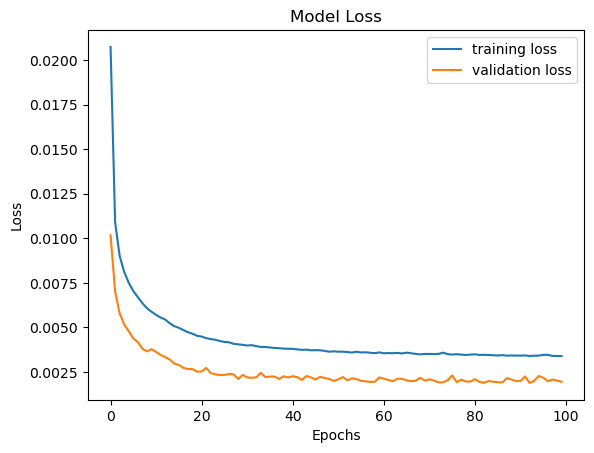

In [291]:
plt.plot(history_ae.history["loss"])
plt.plot(history_ae.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["training loss","validation loss"], loc="upper right")
plt.show()

The training loss is higher than validation loss due to the use of regularisation in the form of dropout.

Regularisation adds an extra penalising term to the training loss function. This makes the training loss greater than the validation loss.

Apart from this, both loss curves are consistenly decreasing with the number of epochs which shows that the model is improving with training without overtraining.

### Evaluating the best model

In [53]:
# Loading best model
ae = model_ae(15,3,"relu",0.05)
ae.load_weights("dim=15,layers=3,activ=relu,d=0.05(patience=20,epochs=100).hdf5")

In [54]:
# Combined SM (background) and BSM "outliers" in a mixed dataset
mixed = np.vstack((x_test, BSM_samples))
pred_mixed = ae.predict(mixed)
test_mse_loss = np.mean(np.square(pred_mixed - mixed), axis=1)

5993/5993 [==============================] - 8s 1ms/step


In [57]:
back = test_mse_loss[:x_test.shape[0]]
signal = get_sig_loss(test_mse_loss,BSM_sample_IDs)
aucs = []
for i in range(9):
    sig = signal[i]
    effs = []
    for dist in [back,sig]:
        # Normalise distributions
        non_zero = np.count_nonzero(~np.isnan(dist))
        weights = np.ones_like(dist)/float(non_zero)
        # Calculate signal and background efficiencies
        frac = np.histogram(dist,bins=np.linspace(0,0.3,500),weights=weights)[0]
        eff = 1-np.append(0,np.cumsum(frac))
        effs.append(eff)
    # Find area under ROC curve
    aucs.append(metrics.auc(effs[0], effs[1]))
avg_auc = np.mean(aucs) # take mean of all roc curve areas

In [83]:
print("Previous best average ROC AUC from grid search: ",grid_search_auc.sort_values("avg_auc")["avg_auc"].iloc[-1])
print("Improved average ROC AUC: ",round(avg_auc,6))

Previous best average ROC AUC from grid search:  0.749716
Improved average ROC AUC:  0.752187


#### Explore different architectures for the model, and explain in detail your choice of model, and the final parameters chosen.
To find the best model architecture a hyperparameter grid search was carried out.

The chosen model produced the highest average ROC AUC across the BSM samples.

This model has the following hyperparameters:

- Kernel initialisation = default

- Optimiser = adam

- Input features = leading 8 objects + log(MET) + METphi + n_electrons + n_muons + n_jets + n_bjets + n_photons

- activation: relu

- dropout: 0.05

- latent dim.: 15

- number of hidden layers: 3, nodes [200,200,20]

### Signal and background efficiencies across different anomaly scores

In [61]:
BSM_sample_names = list(dict.fromkeys(BSM_sample_IDs["process ID"]))

sample_names = ["SM"]+BSM_sample_names

Efficiency as a function of anomaly score

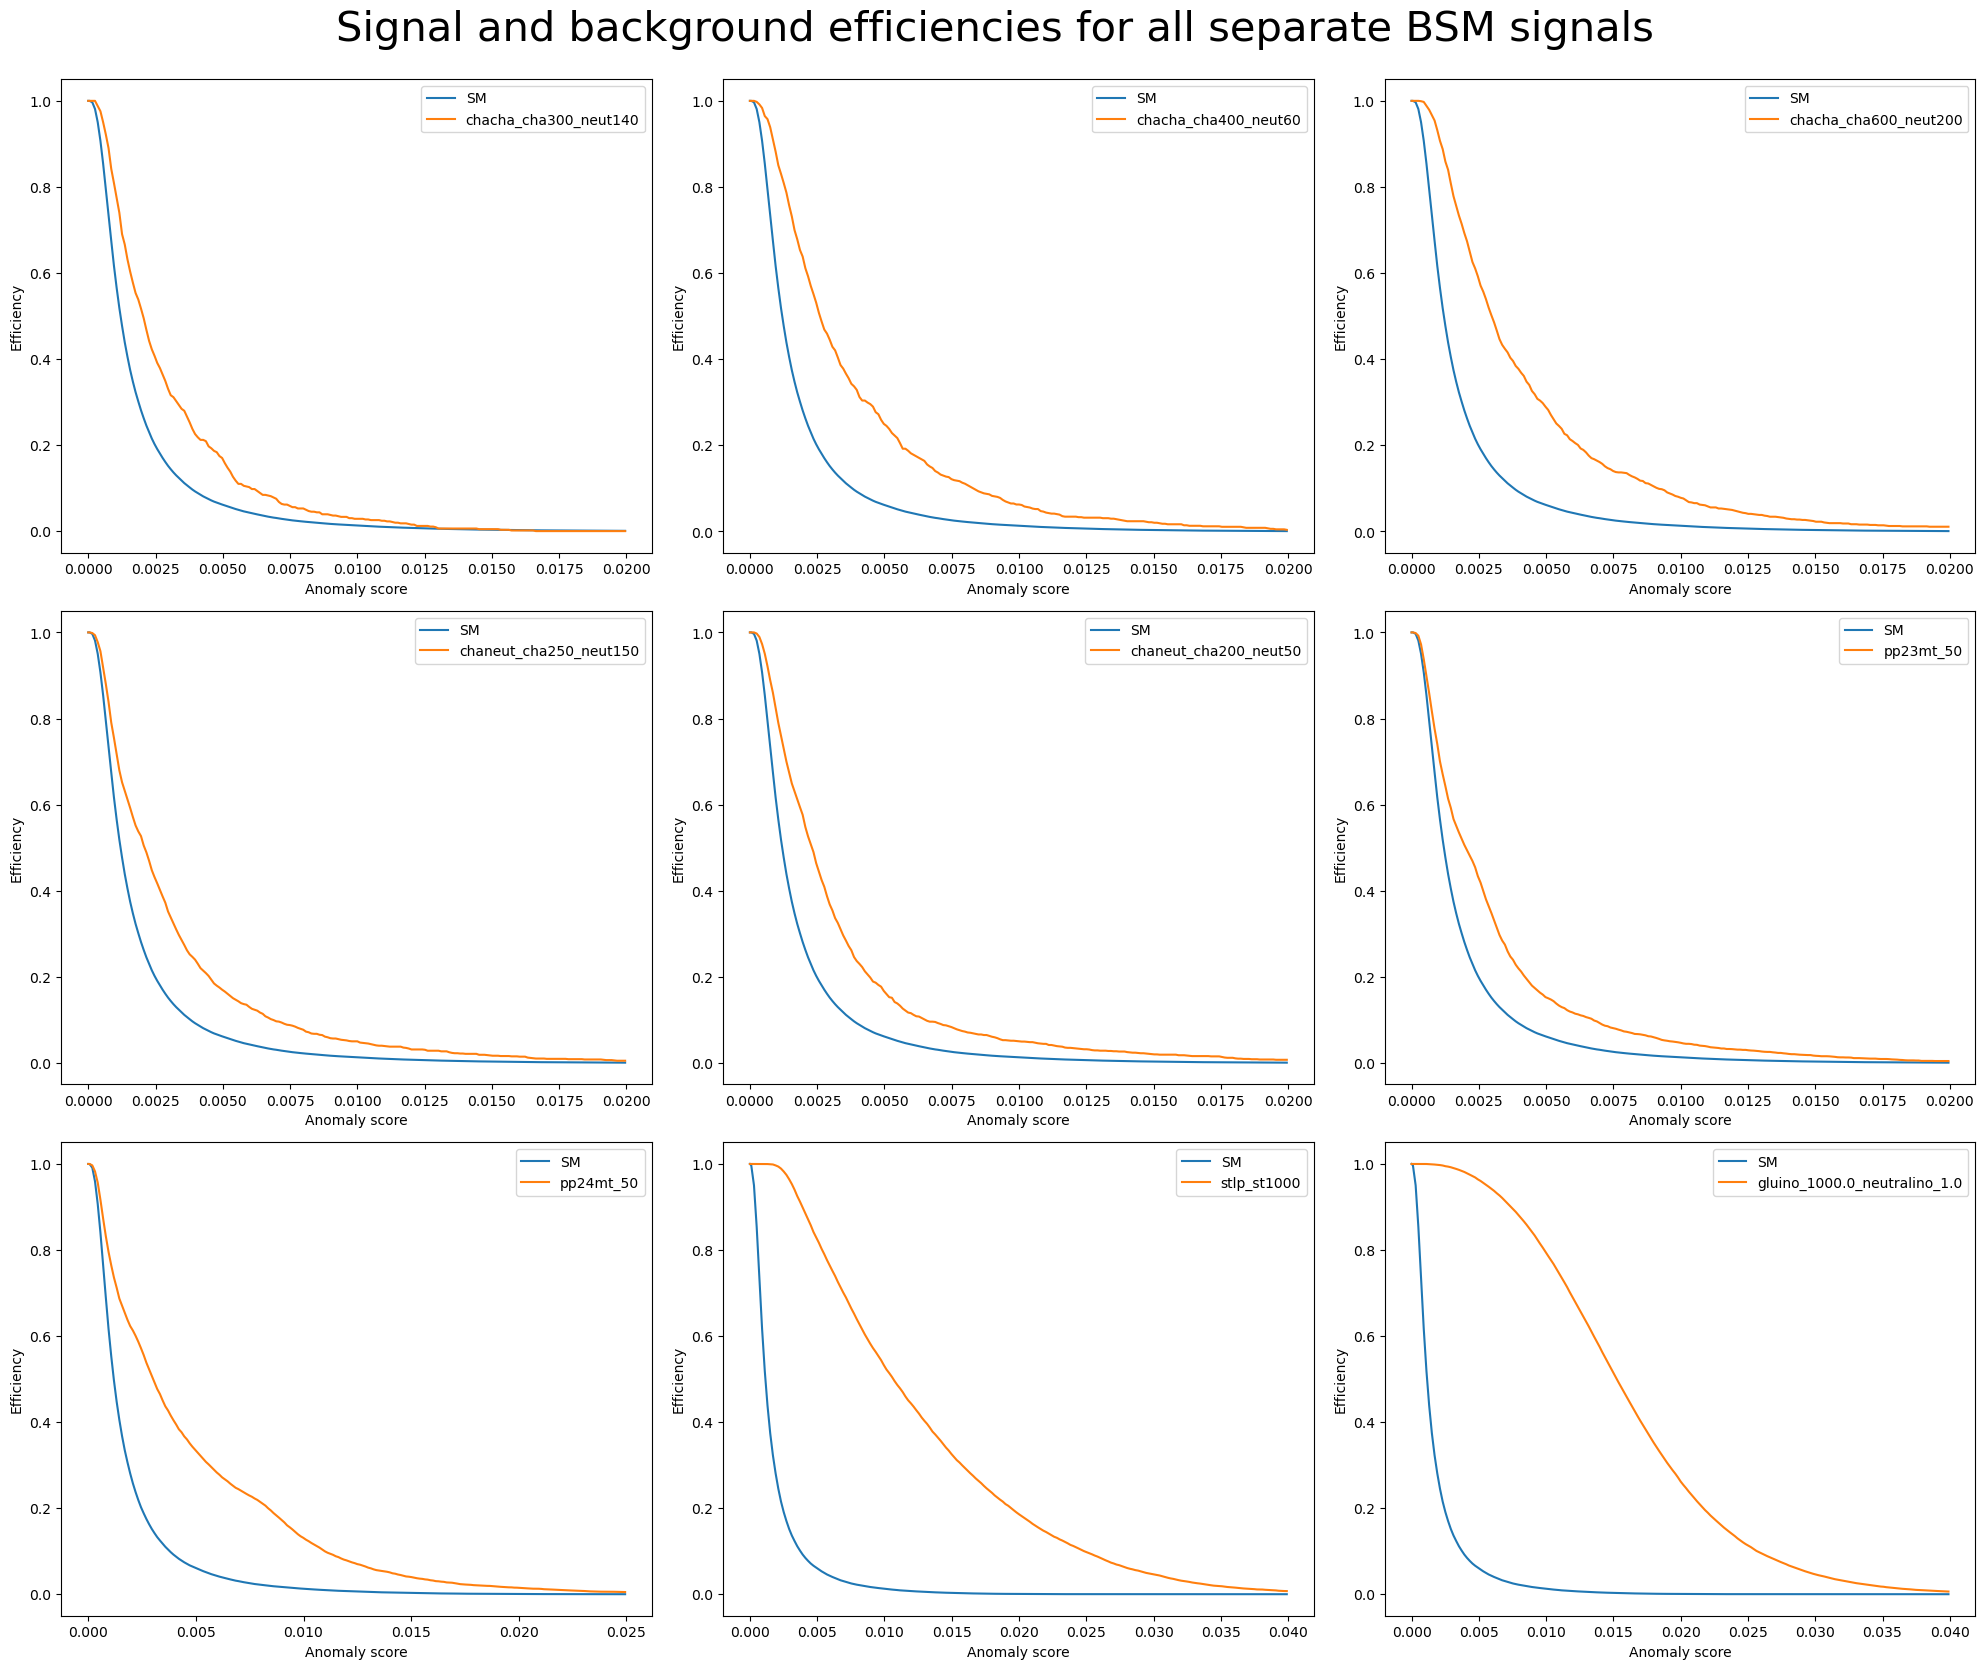

In [117]:
plt.figure(figsize=(20,80))
back = test_mse_loss[:x_test.shape[0]]
signal = get_sig_loss(test_mse_loss,BSM_sample_IDs)

bins= [np.linspace(0,0.02,200),np.linspace(0,0.02,200),np.linspace(0,0.02,200),np.linspace(0,0.02,200),
      np.linspace(0,0.02,200),np.linspace(0,0.02,200),np.linspace(0,0.025,200),np.linspace(0,0.04,200),
      np.linspace(0,0.04,200)]

for i in range(9):
    ax = plt.subplot(15,3,i+1)
    sig = signal[i]
    # Find plotting interval width
    bin_width = bins[i][1]-bins[i][0]
    # Get the plotting intervals
    bin_centres =  np.append(0,np.linspace(bins[i][0]+(bin_width/2),bins[i][-1]-(bin_width/2),199))
    for dist in [back,sig]:
        # Normalise distributions
        non_zero = np.count_nonzero(~np.isnan(dist))
        weights = np.ones_like(dist)/float(non_zero)
        # Calculate signal and background efficiencies
        frac = np.histogram(dist,bins=bins[i],weights=weights)[0]
        eff = 1-np.append(0,np.cumsum(frac))
        # Plot efficiencies at each interval
        plt.plot(bin_centres,eff)
    plt.ylabel("Efficiency")
    plt.xlabel("Anomaly score")
    plt.legend(["SM",sample_names[i+1]])
    
plt.suptitle("Signal and background efficiencies for all separate BSM signals",y=1,size=30)
plt.tight_layout()
plt.show()

### How might you choose a value which flags up a non-SM event?

A threshold to decide which events are flagged up as BSM signal events can be determined using the "significance improvement metric". This metric is used so that a threshold is chosen agnostically to the signal and background cross-sections.

As stated in the paper: 
<b>The Dark Machines Anomaly Score Challenge: Benchmark Data and Model Independent Event Classification for the Large Hadron Collider</b>

The significance of a new physics signal can be estimated in terms of the significance before any selection
is applied. This is given by $\sigma_S=\frac{S}{\sqrt{B}}$

When the autoencoder is applied and a threshold is chosen a selection is made on the signal and background events. This changes the significance by the signal and background efficiency at the given anomaly score threshold. The new significance is given by $\frac{\epsilon_S}{\sqrt{\epsilon_B}} \times \sigma_S$

Therefore the Significance Improvement (SI) can be defined as $\frac{\epsilon_S}{\sqrt{\epsilon_B}}$

The SI is a handle for the statistical purity of the signal over the SM noise. 


Three trial working points are chosen which cut out a significant fraction of the background: $\left[\epsilon_S\left(\epsilon_B=10^{-2}\right)\right]$,
$\left[\epsilon_S\left(\epsilon_B=10^{-3}\right)\right]$ and 
$\left[\epsilon_S\left(\epsilon_B=10^{-4}\right)\right]$.

The SI is calcuated at each of the working points and the working point with highest SI is chosen as the threshold to flag up non-SM events. This working point maximises the likelihood of detecting new physics for the given BSM sample.

The chosen thresholds can be seen in the anomaly score distributions for each BSM sample below.

In [69]:
def max_signif_improve(data):
    back_length = x_test.shape[0]
    back_eff = [0.01,0.001,0.0001]
    signif_improve = []
    loss_cuts = []
    for i, back_eff in enumerate(back_eff):
        # Find anomaly score threshold for each background efficiency
        loss_cut = test_mse_loss[np.argsort(-test_mse_loss[:back_length])[:int(back_length*back_eff)]].min()
        # Find signal efficiency at each anomaly score threshold
        sig_pass = np.where(data>loss_cut)[0].shape[0]
        sig_total = data.shape[0]
        sig_eff = sig_pass/sig_total
        # Calculate significance improvement
        signif_improve.append(sig_eff/np.sqrt(back_eff))
        loss_cuts.append(loss_cut)
        
    # Return anomaly threshold at highest significance improvement 
    return loss_cuts[np.argmax(signif_improve)]

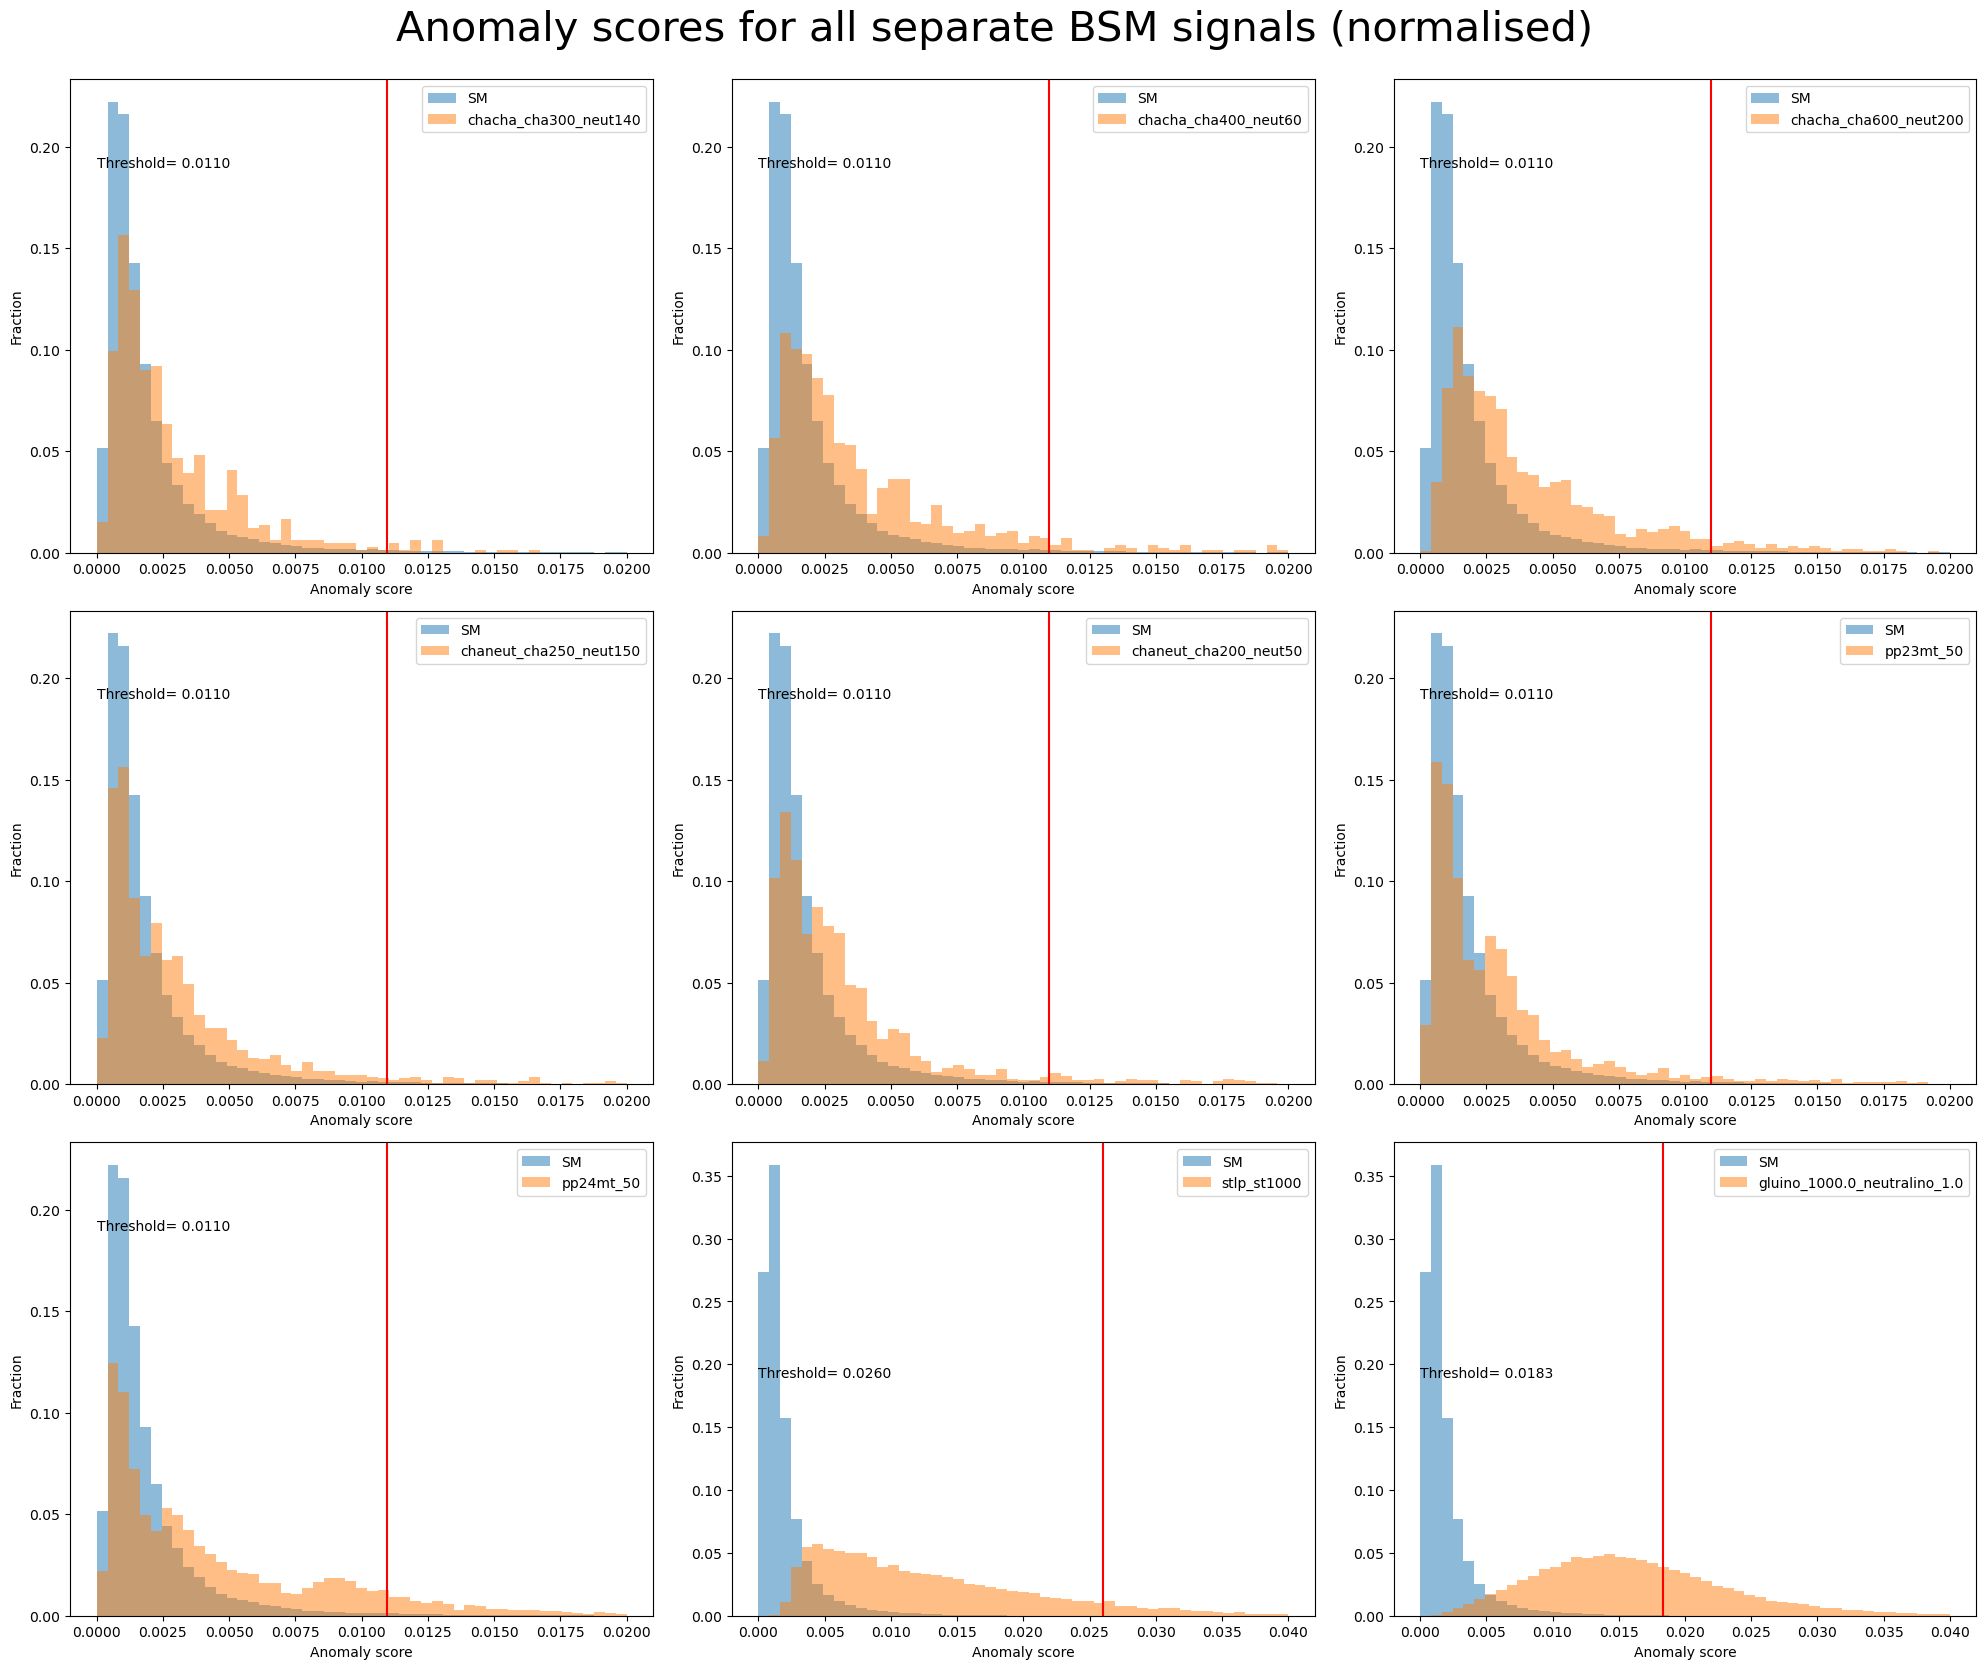

In [114]:
plt.figure(figsize=(20,80))
signal = get_sig_loss(test_mse_loss,BSM_sample_IDs)

bins= [np.linspace(0,0.02,50),np.linspace(0,0.02,50),np.linspace(0,0.02,50),np.linspace(0,0.02,50),
      np.linspace(0,0.02,50),np.linspace(0,0.02,50),np.linspace(0,0.02,50),np.linspace(0,0.04,50),
      np.linspace(0,0.04,50)]

for i in range(9):
    ax = plt.subplot(15,3,i+1)
    sig = signal[i]
    fractions = np.array([])
    for j in [back,sig]:
        # Normalise distributions
        non_zero = np.count_nonzero(~np.isnan(j))
        weights = np.ones_like(j)/float(non_zero)
        plt.hist(j,alpha=0.5,bins=bins[i],weights=weights)

    plt.xlabel("Anomaly score")
    plt.ylabel("Fraction")
    plt.legend(["SM",sample_names[i+1]])
    
    # Plot the threshold
    cut_off = max_signif_improve(sig)
    plt.axvline(cut_off,color="red")
    plt.text(x=0,y=0.19,s="Threshold= "+"{:.4f}".format(round(cut_off, 4)))
    
plt.suptitle("Anomaly scores for all separate BSM signals (normalised)",y=1,size=30)    
plt.tight_layout()
plt.show()

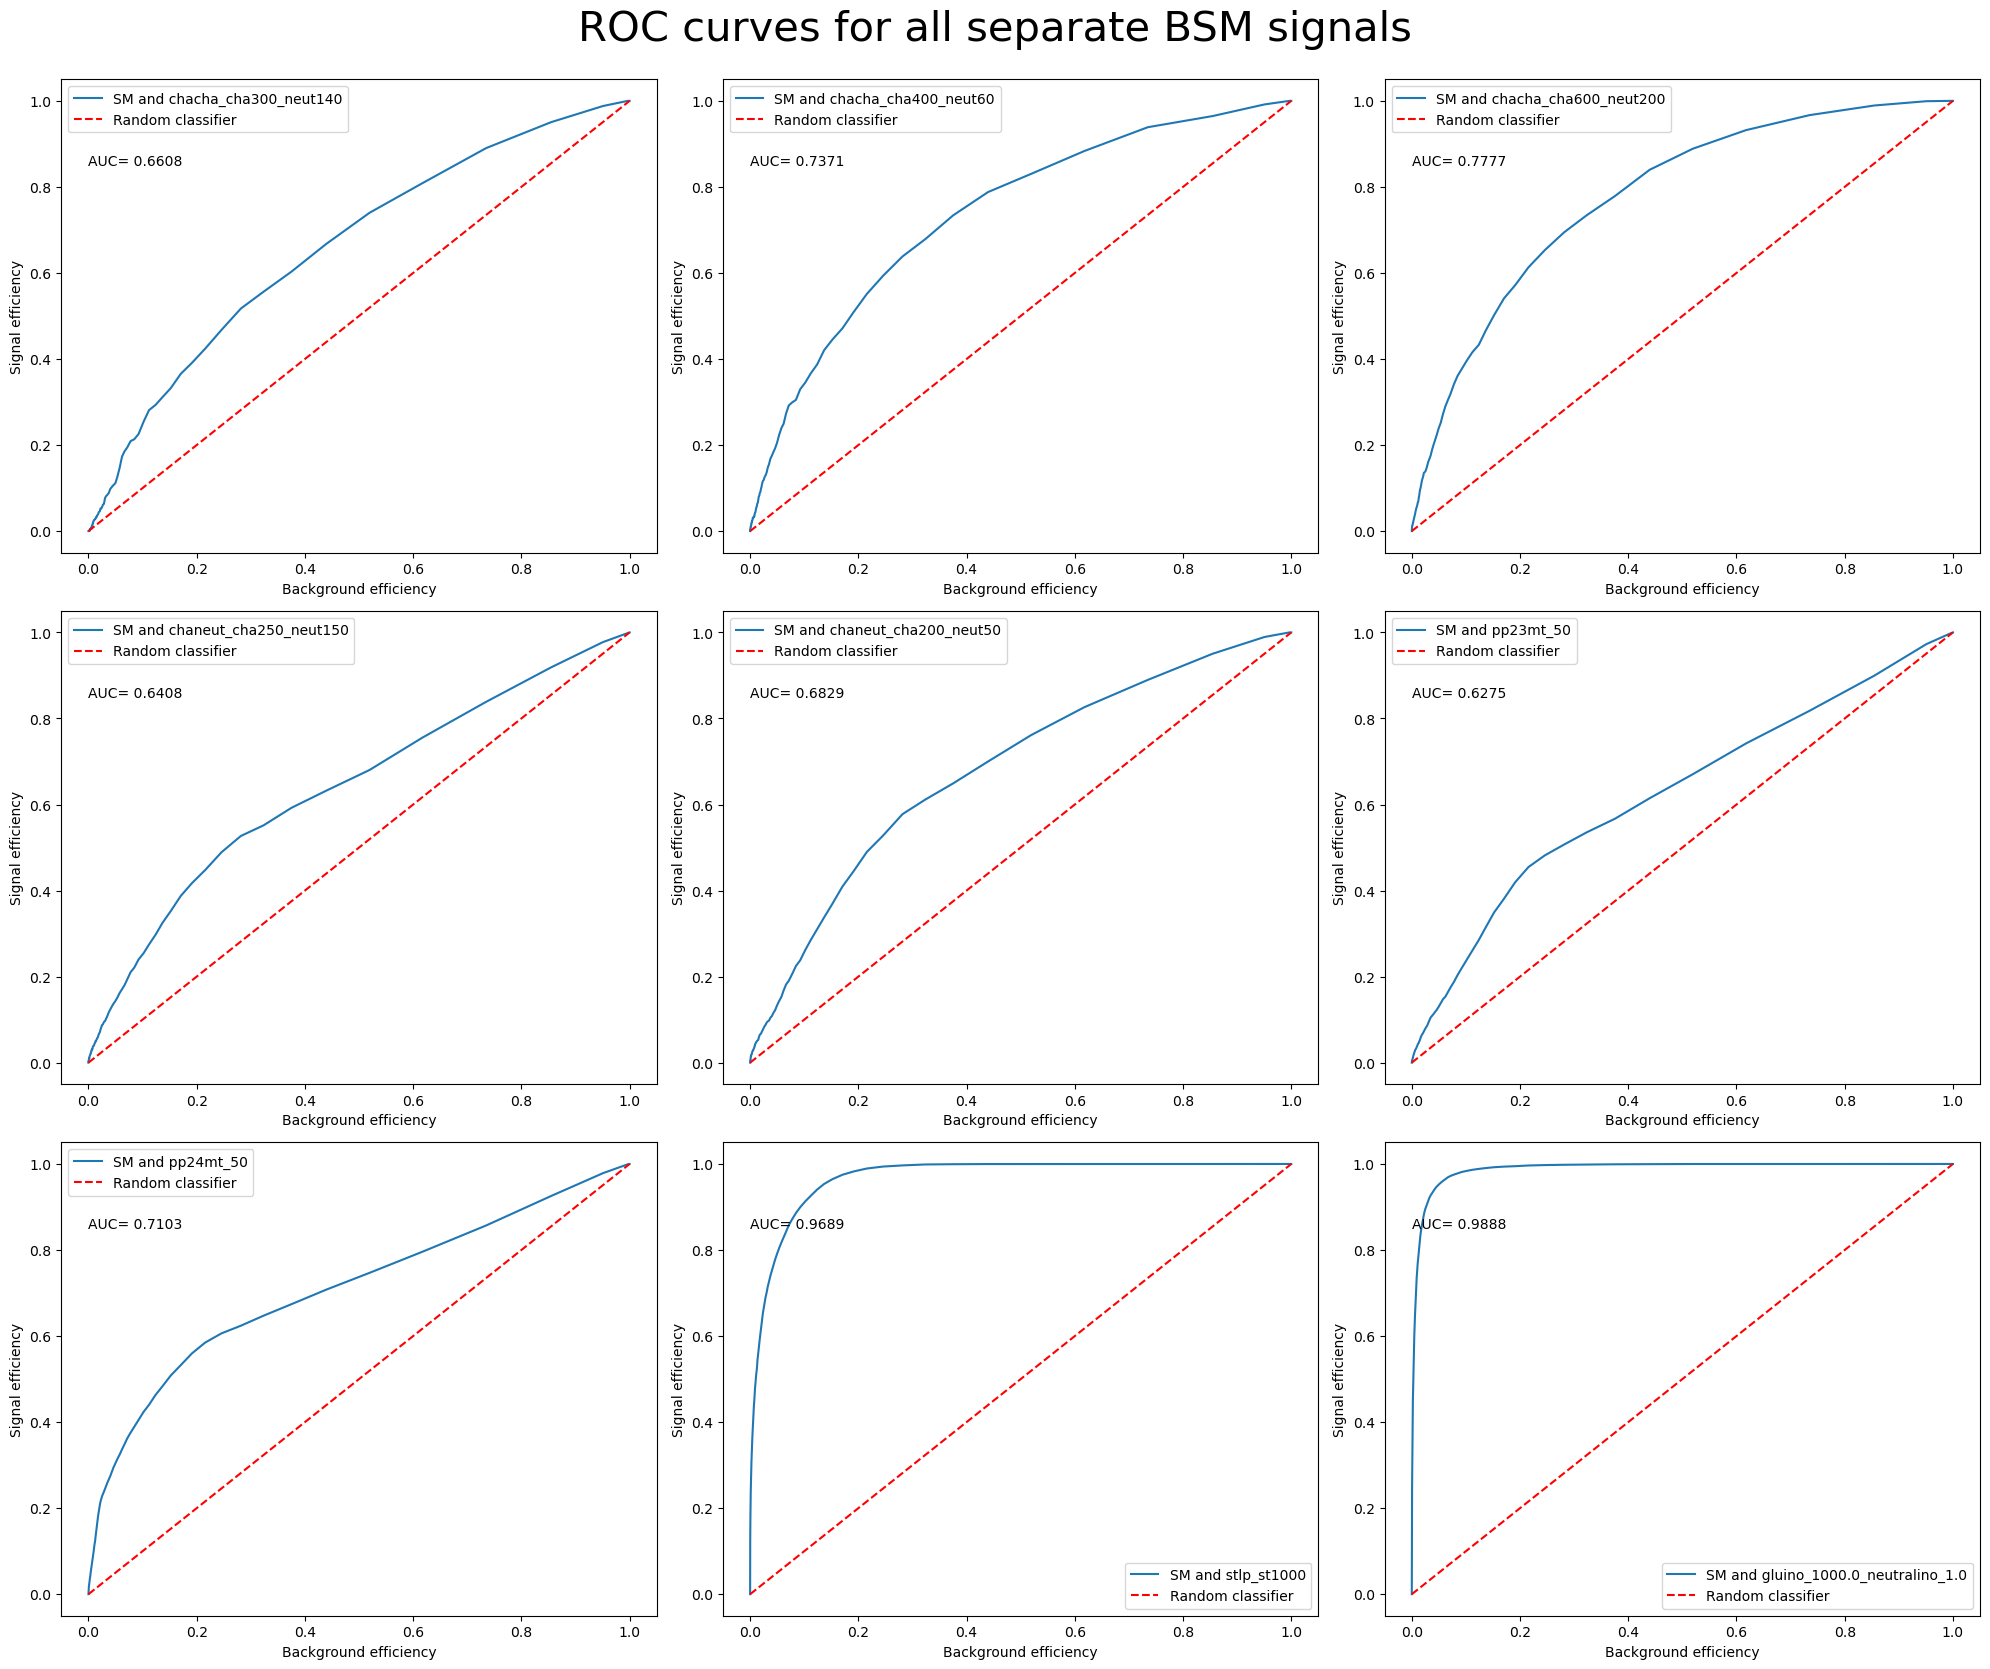

In [108]:
plt.figure(figsize=(20,80))
signal = get_sig_loss(test_mse_loss,BSM_sample_IDs)

for i in range(9):
    ax = plt.subplot(15,3,i+1)
    sig = signal[i]
    bins=np.linspace(0,0.06,300)
    effs = []
    for dist in [back,sig]:
        # Normalise distributions
        non_zero = np.count_nonzero(~np.isnan(dist))
        weights = np.ones_like(dist)/float(non_zero)
        # Calculate signal and background efficiencies
        frac = np.histogram(dist,bins=bins,weights=weights)[0]
        eff = 1-np.append(0,np.cumsum(frac))
        effs.append(eff)
    # Plot ROC curve
    plt.plot(effs[0],effs[1])
    # Calculate AUC
    auc = metrics.auc(effs[0], effs[1])
    plt.text(x=0,y=0.85,s="AUC= "+"{:.4f}".format(round(auc, 4)))
    plt.plot([0,1], [0,1], linestyle='--', color='red')
    plt.xlabel("Background efficiency")
    plt.ylabel("Signal efficiency")
    plt.legend(["SM and "+sample_names[i+1],"Random classifier"])
    
plt.suptitle("ROC curves for all separate BSM signals",y=1,size=30)
plt.tight_layout()
plt.show()

- All BSM sample ROC curves show improved classification performance over random guessing.


- From the earlier data visualisation we saw that the gluino and stlp samples had the largest spread in variables, with the most associated objects and highest mean MET. The properties of the these events have manifest in the AE giving them much higher anomaly scores than the background and has allowed them to be more easily picked up by the anomaly detection threshold. This produces ROC area under the curve closer to 1 for these samples.


- The remaining BSM samples show considerably lower AUC values meaning the AE has a harder time setting them apart from the background.

### Which BSM samples are more or less similar to the SM?

From the anomaly score distributions we can see that the chacha, chanaut, pp23mt and pp24mt samples have the least separation in anomaly scores compared to the background and are therefore most similar to the SM samples.

From these samples chacha_cha400, chacha_cha600 and pp24mt standout as having slighly higher AUC. This shows that these BSM samples are slighly more different to SM sample signatures.

The stlp and gluino samples have the highest AUC and have the clearest separation in anomaly scores from the background. This shows that these BSM samples have signatures that are quite different from the SM samples and this makes them much easier to distinguish via anomaly detection.

### Does the model generalise well to data it hasn't seen?

From these results we can see that the model consistantly gives a lower anomaly score for the background as compared to each individual signal sample. The very low val_loss achieved in training is projected to a high average ROC AUC for all BSM samples. This shows that the model generalises well to unseen data.

### Exploring SM events

Plotting the variable distributions of the 5% most anomalous SM events

The most relevant variables will be plotted for the comparison.

Plotting all event level variables, variables of first two most energetic objects and energy and pt variables of 6th most energetic object to get a wider range of view.

In [90]:
back_length = x_test.shape[0]
most_anom = np.argsort(-test_mse_loss[:back_length])[:int(back_length*0.05)]

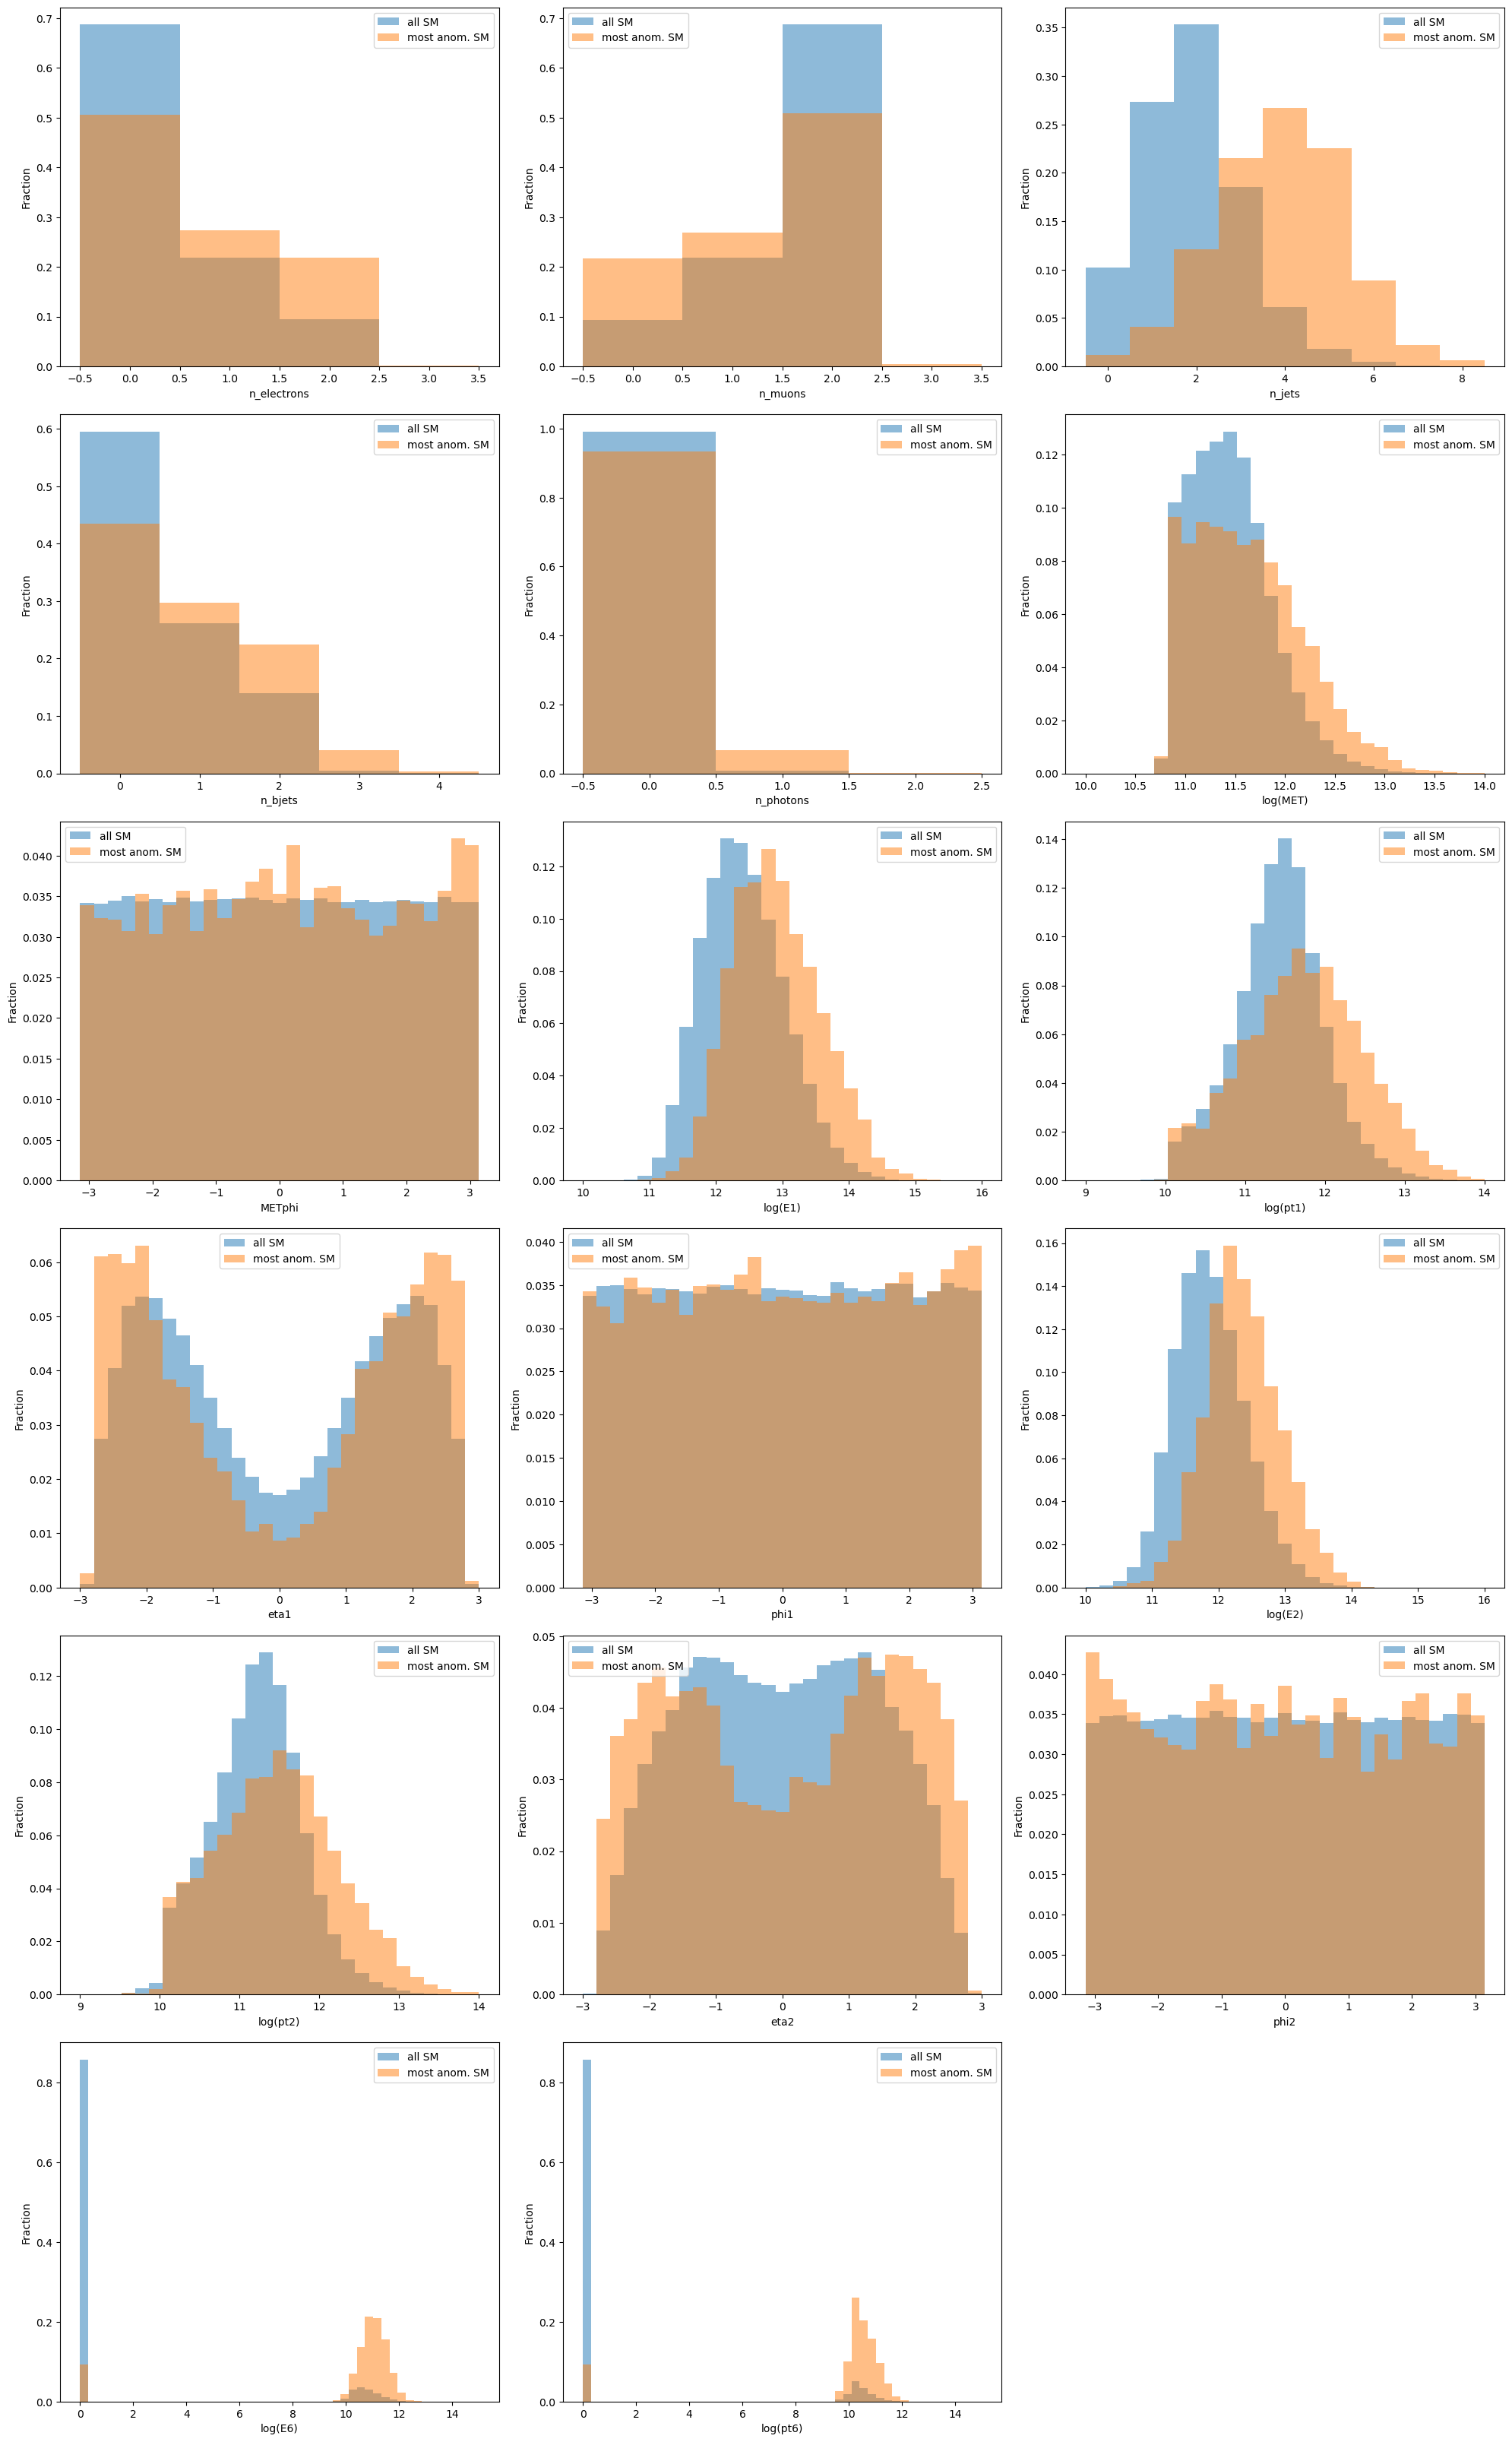

In [94]:
plt.figure(figsize=(20,80))

var_names = np.append(X.columns[:15],["log(E6)","log(pt6)"])

bins = [np.linspace(-0.5,3.5,5),np.linspace(-0.5,3.5,5),np.linspace(-0.5,8.5,10),np.linspace(-0.5,4.5,6),
        np.linspace(-0.5,2.5,4),np.linspace(10,14,30),np.linspace(-np.pi,np.pi,30),np.linspace(10,16,30),
        np.linspace(9,14,30),np.linspace(-3,3,30),np.linspace(-np.pi,np.pi,30),np.linspace(10,16,30),
        np.linspace(9,14,30),np.linspace(-3,3,30),np.linspace(-np.pi,np.pi,30),np.linspace(0,15,50),
        np.linspace(0,15,50)]

for i, var in enumerate(var_names):
    ax = plt.subplot(15,3,i+1)
    for j in [X[var],X[var].iloc[idx_test[most_anom]]]:
        # Normalise distributions
        non_zero = np.count_nonzero(~np.isnan(j))
        weights = np.ones_like(j)/float(non_zero)
        plt.hist(j,alpha=0.5,bins=bins[i],weights=weights)

    plt.xlabel(var)
    plt.ylabel("Fraction")
    plt.legend(["all SM","most anom. SM"])        
plt.tight_layout()
plt.show()

The 5% most anomalous events show that on average they:

- Have more electrons and fewer muons

- Have considerably more jets

- Have more bjets

- Have similar number of photons

- Have higher MET

- Have a quite uniform phi1 distribution

- Have METphi and phi2 distributions that are generally uniform

- Have higher E1, E2 and pt1, pt2

- Have preference for forward eta1 and eta2 regions around 2 and -2.

- Have  many more non-zero values for E6 and pt6. These variables show that anomalous events are much more likely to have atleast 6 objects associated with them.

The general trend we can take away from these points is that anomalous events tend to have more energetic objects and have more objects associated with them. Objects associated to anomalous events tend be more likely to be electrons than muons. Anomalous events have higher MET, meaning more unobserved objects are created in collisions. The two most energetic objects in anomalous events tend to have more forward eta values.

As seen in the BSM feature visualisation earlier, the majority of the features that anomalous events have are also shared by the BSM events. This explains the reason the auto encoder gave these SM events higher anomaly scores, and why these events are harder to separate from the BSM signals.

### Discuss any limitations your algorithm has. How might you update and improve your model in future? Discuss any issues you had, or things you would have liked to try given more time.

- The alogrithm could have been trained for even more epochs as it did not stop early in the training.


- The hyperparameter grid search could be expanded by trying out a wider range of each hyperparameter domain space.


- More hyperparameters could have been added to the grid search such as the optimiser, the input features, the kernel initialisation and number of hidden layer nodes. The training hyperparameters could have also been added  to the grid search, such as the batch size, validation set size and train-test split ratio.


- A different optimisation technique other than grid search could have been implemented to compare the optimisation results.


- Would have been quite interesting to also train a VAE, ConvAE or ConvVAE to see how the separation in anomaly scores between the SM and BSM samples would change.